In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import sys
import pandas as pd
import tensorflow
import keras
import wordcloud
import nltk
import inspect
import re
import unicodedata

nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import RSLPStemmer #Stemmer for portugese words.

from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest
stop = stopwords.words('portuguese')
stop.append('nao') #Stopword already have "Não", just adding this because it's appear on dataframe

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipecadavid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Defining functions
def PCA_var(varianza,X):
    """
    Function responsible for calculating the number of components to explain the % of variance 
    
    Returns:
        number of components
    """
 
   
    pca = PCA(varianza)
    pca_fit = pca.fit(X)
    features = pca_fit.n_components_
    
    return features
    
    
def PCA_comp(comp,X):
    """
    Function responsible for calculating the explained variance based on a number of components
    
    Returns:
        Explained variance
    """
    
    pca = PCA(n_components=comp)
    pca_fit = pca.fit(X)
    var = np.sum(pca_fit.explained_variance_ratio_)
    
    return var
    
    

def format_spines(ax, right_border=True):
    """
    This function is responsible for format axis from graphs
    
    Input:
        ax: matplotlib axis
        right_border: boolean flag for plot the right border of graphs
    
    Output:
        None
    """    
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def bar_plot(x, y, df, ax, colors='Blues_d', hue=False, value=False):
    """
    This function plots, and customize a bar chart

    Input:
        x: feature to be plotted on x axis
        y: feature to be plotted on y axis
        df: DataFrame object with features used on x and y
        colors: standard palette is "Blues_d"
        hue: separation value, standard is False
        value: flag for defining if the data labels on bars will be the value (True) or percentual (False)
        
    Returns:
        None
    """
    # Counting numerical feature (x or y)
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    
    # Plotting
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Customizing data labels (values of percents)
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom')
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom')
            
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    This function is used for calculating working days between two dates
    as an additional column on a DataFrame
    
    Input:
        series_names: name of the new series created with working days calculated
        df: DataFrame object with the dates
        date_col1: date column 1
        date_col2: date column 2
        
    Returns:
        df_return: DataFrame with working days columns
    """
    # Creating a list with the difference between dates
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adding column in a DataFrame object
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

def communicate_params(freight, deliv, est):
    """
    Additional function create for helping on graphical exploration (state dashboard)
    
    Input:
        freight: freight value to be plotted as a text
        deliv: delivery time to be plotted as a text
        estimative: differente between delivery time and estimative time to be plotted as a text
    
    Returns:
        None
    """  
    # Comunicando o frete
    axs[0, 0].text(0.10, 0.30, f'R${freight:.2f}', fontsize=45)
    axs[0, 0].text(0.07, 0.12, 'is the mean value of freight paid', fontsize=12)
    axs[0, 0].text(0.25, 0.00, 'for online shopping', fontsize=12)
    axs[0, 0].axis('off')

    # Comunicando tempo médio de entrega
    axs[0, 1].text(0.13, 0.30, f'{deliv:.2f}', fontsize=45)
    axs[0, 1].text(0.62, 0.30, 'working days', fontsize=12)
    axs[0, 1].text(0.07, 0.12, 'is the average delay for delivery', fontsize=12)
    axs[0, 1].text(0.23, 0.00, 'for online shopping', fontsize=12)
    axs[0, 1].axis('off')

    # Comunicando diferença entre tempo de entrega e tempo estimado
    axs[0, 2].text(0.18, 0.30, f'{est:.2f}', fontsize=45)
    axs[0, 2].text(0.58, 0.30, 'working days', fontsize=12)
    axs[0, 2].text(0.07, 0.12, 'is the difference between estimated', fontsize=12)
    axs[0, 2].text(0.23, 0.00, 'date and delivery date', fontsize=12)
    axs[0, 2].axis('off') 
    
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False, xlabel=[], ylabel='State'):
    """
    This function is used for plotting a comparative study on 5 better and 5 worst according to the topic
    
    Input:
        df: DataFrame object with the data
        col: column to be studied
        title: title
        xlim: xlim
        n_row: line index where the graph will be plotted
        n_col: column index where the graph will be plotted
    """
    # Axis definition
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # First step: Top 5
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    ax_top.set_xlabel(xlabel)
    if n_col > 0:
        ax_top.set_ylabel('')
    else:
        ax_top.set_ylabel(ylabel)
    
    # Second step: Last 5
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Highest', 'Lowest'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)
    ax_last.set_xlabel(xlabel)
    if n_col > 0:
        ax_last.set_ylabel('')
    else:
        ax_last.set_ylabel(ylabel)
        
def donut_plot(col, ax, df, labels, text='', flag_ruido = 0,
               colors=['navy', 'lightsteelblue', 'lightgreen', 'crimson', '']):
    """
    This function plots a customized donut plot
    
    Input:
        col: coluna a ser analisada e plotada no gráfico de rosca
        ax: matplotlib axis
        df: DataFrame with data
        labels: list of labels to be plotted
        text: text to be plotted on the center of the donut
        flag_ruido: thie parameter indicates the number of labels to be filtered from plot
        colors: list of colors (4 colors from default)
    """
    flag_ruido = flag_ruido * -1
    if flag_ruido < 0:
        sizes = df[col].value_counts().values[:flag_ruido]
        labels = labels[:flag_ruido]
    else:
        sizes = df[col].value_counts().values
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    
def text_process(c):
    """
    Function responsible for removing punctuation and stopwords from reviews
    
    Input:
        c: customer review
    
    Output:
        reviews without punctuation and stopwords
    """
    # Remove punctuation
    nopunc = [char for char in c if char not in string.punctuation]

    # Join string again
    nopunc = ''.join(nopunc)
    
    # Remove stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('portuguese')]

def stem_processing(c):
    """
    Function repsonsible for apply stemming on reviews
    
    Input:
        c: customer review
        
    Output:
        review after stemming
    """
    
    stemmer = RSLPStemmer()
    return list(map(lambda x: stemmer.stem(x), [word for word in c.split()]))

def create_dataset():
    """
    Function responsible for creating an empty DataFrame object with some of classification metrics
    
    Returns:
        empty DataFrame object
    """
    attributes = ['acc', 'prec', 'rec', 'f1', 'total_time']
    model_performance = pd.DataFrame({})
    for col in attributes:
        model_performance[col] = []
        
    return model_performance

def model_analysis(model, X, y, X_test, y_test, df_performance, cv=5, train=True):
    """
    Function responsible for evaluate a classification model and save the results on a DataFrame object
    
    Input:
        model: model to be used on evaluation
        X, y, X_test, y_test: train and test data (with target labels)
        df_performance: empty DataFrame (generated by create_dataset() function)
        cv: cross validation k folds

    Returns:
        a DataFrame object with classification metrics selected
    """
    # Accuracy, precision, recall and f1_score on training set using cv
    t0_cv = time.time()
    acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
    rec = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
    # Time spent on cross_validation prediction
    t1_cv = time.time()
    delta_time_cv = t1_cv-t0_cv
    
    # Evaluation using the test set
    t0_test = time.time()
    y_pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    y_scores_test = model.predict_proba(X_test)[:, 1]
    # Time spent on test prediction
    t1_test = time.time()
    delta_time_test = t1_test-t0_test

    # Saving on dataframe
    performances = {}
    performances['acc'] = round(acc, 4)
    performances['prec'] = round(prec, 4)
    performances['rec'] = round(rec, 4)
    performances['f1'] = round(f1, 4)
    performances['total_time'] = round(delta_time_cv, 3)        
    df_performance = df_performance.append(performances, ignore_index=True)
    
    test_performances = {}
    test_performances['acc'] = round(acc_test, 4)
    test_performances['prec'] = round(prec_test, 4)
    test_performances['rec'] = round(rec_test, 4)
    test_performances['f1'] = round(f1_test, 4)
    test_performances['total_time'] = round(delta_time_test, 3)        
    df_performance = df_performance.append(test_performances, ignore_index=True)
    
    model_name = model.__class__.__name__
    df_performance.index = [model_name+' cv', model_name+' test']
    
    return df_performance

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function plots a customized confusion matrix
    
    Input:
        cm: confusion matrix generated from sklearn's method confusion_matrix(set, predictions)
        classes: target labels to be plotted
        title: title
        cmap: matrix color
    Output:
        None
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Plot configuration
    thresh = cm.max() / 1.2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def style_function(feature):
    """
    Customize maps
    """
    return {
        'fillColor': '#ffaf00',
        'color': 'grey',
        'weight': 1.5,
        'dashArray': '5, 5'
    }

def highlight_function(feature):
    """
    Customize maps
    """
    return {
        'fillColor': '#ffaf00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }

def plot_sentimento(model, frase):
    """
    This function receives a text example and uses a classification model to predict
    the sentiment label and communicate the result in a graphic plot
    
    Input:
        model: classification model
        frase: pre processed text
    
    Output:
        result plotted on matplotlib
    """
    # Predicting
    pred = model.predict(frase)
    fig, ax = plt.subplots(figsize=(5, 3))
    if pred[0] == 1:
        text = 'Positive'
        proba = 100 * round(model.predict_proba(frase)[0][1], 4)
        color = 'seagreen'
    else:
        text = 'Negative'
        proba = 100 * round(model.predict_proba(frase)[0][0], 4)
        color = 'crimson'
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment', fontsize=14)
    plt.show()

In [5]:
os.getcwd()

'/Users/felipecadavid/Documents/Coisas Dani/201920/03_Codigos'

In [6]:
os.chdir("/Users/felipecadavid/Documents/Coisas Dani/201920/00_Bases/brazilian-ecommerce/")
os.getcwd()

'/Users/felipecadavid/Documents/Coisas Dani/201920/00_Bases/brazilian-ecommerce'

In [7]:
orders=pd.read_csv('data_tratada_v_nao.csv')

In [8]:
####### ACA SE CREA EL BOW
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(orders.review_comment_message).toarray()


In [9]:
X_tfidf.shape

(41753, 10176)

In [10]:
# Creating the class label
bin_edges = [0, 2, 5]
bin_names = ['0', '1']
orders['class'] = pd.cut(orders['review_score'] , bins=bin_edges, labels=bin_names)
#orders = orders.iloc[:, np.r_[0, 1, 3, 4, 2, 5,6]

In [11]:
#orders.head(5)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(orders.review_comment_message)

In [13]:
y = orders['class'].values
Y_tf = y.astype(int)
Y_tf

array([1, 1, 1, ..., 1, 0, 0])

In [18]:
# Convert our matrix to a dense matrix and convert to a DataFrame, adding the actual column names
dense = pd.DataFrame(X_tfidf.todense(), columns=vectorizer.get_feature_names())
# Convert our matrix to a dense matrix and convert to a DataFrame, adding the actual column names
Y_tf = pd.DataFrame(Y_tf, columns=['Y_tf'])

# Re-join with our original dataset
output_tf = pd.concat([dense, Y_tf],axis=1)
#output_tf = output_tweets.drop("tweets_text", 1)
#df_tfidf = pd.DataFrame(output_tf)
output_tf.to_csv("output_tf.csv", encoding='utf-8') # Takes a long time -- very large dataset!

In [14]:
from pyspark import SparkContext
sc = SparkContext('local[*]')

In [16]:
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [15]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.clustering import GaussianMixture
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel

In [21]:
df = (sqlc.read.format('output_tf.csv')
      .options(header='false', inferschema='true'))

In [29]:
df_test = sqlc.createDataFrame(dense, ["features"])

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.readRDDFromFile.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.api.python.PythonRDD$.readRDDFromInputStream(PythonRDD.scala:188)
	at org.apache.spark.api.python.PythonRDD$.readRDDFromFile(PythonRDD.scala:175)
	at org.apache.spark.api.python.PythonRDD.readRDDFromFile(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:745)


In [ ]:
#assembler = VectorAssembler(
#    inputCols=[ ['Y_tf']],
#    outputCol="features")
#output = assembler.transform(df)

In [ ]:
standardizer = StandardScaler(withMean=True, withStd=True,
                              inputCol='features',
                              outputCol='std_features')
model = standardizer.fit(df_test)
output = model.transform(df_test)

In [64]:
import h2o
h2o.init(ip="localhost", port=54321)
#h2o.cluster().show_status()
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 hour 24 mins
H2O cluster timezone:,America/Sao_Paulo
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.2
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_felipecadavid_3xve3n
H2O cluster total nodes:,1
H2O cluster free memory:,84.1 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [65]:
# Load the Birds dataset
data = h2o.import_file("output_tf.csv")


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Total input file size of 1,59 GB is much larger than total cluster memory of 84,1 MB, please use either a larger cluster or smaller data.
  Request: POST /3/Parse
    data: {'destination_frame': 'output_tf.hex', 'parse_type': 'CSV', 'separator': '44', 'single_quotes': 'False', 'check_header': '1', 'number_columns': '10178', 'chunk_size': '106523648', 'delete_on_done': 'True', 'blocking': 'False', 'column_types': '["Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric","Numeric"]', 'column_names': '["","__","aaa","aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa","aaguardando","aainda","aancheira","aaprelho","ab","abafado","abaixado","abaixar","abajour","abajur","abandonar","abar","abastecimento","abaulado","abaular","abc","abcos","abcs","abdominal","abel","abencoar","aber","aberto","abertura","abil","abiram","abisurdo","abolcar","abonar","aborboleta","abordar","aborecendo","aborrecer","aborrecimento","abracar","abraco","abracos","abridor","abrigar","abril","abrir","abs","absolutamente","absorcao","absorvente","absorver","absurdamente","absurdo","absurdooo","absurso","abunciada","abusar","abusivo","ac","acabado","acabamento","acabar","acabemento","acabendo","acabento","acai","acamado","acao","acaro","acarretar","acatar","acdorei","aceitacao","aceitar","aceitavel","acelente","acelerar","acender","acento","acer","acercar","acertado","acertar","aceso","acess","acessar","acessei","acessiveis","acessivel","acesso","acessorio","acessorios","acetinar","acgua","achacolatado","achar","achegar","acidentar","acido","acima","acinzentado","acionam","acionando","acionar","acionarei","acionei","aclimacao","aco","acochoada","acolchoado","acolchoar","acolhedor","acolher","acomodar","acompanhace","acompanhado","acompanhamento","acompanhar","acompra","acomprar","aconchegante","acondicionado","acondicionamento","acondicionar","aconfirmacao","aconpanhar","aconselhar","acontace","aconteca","acontece","acontecer","aconteciera","acopiara","acoplador","acoplamento","acordadeo","acordado","acordar","acorrer","acostumado","acostumar","acqua","acquarela","acrecentar","acredibilidade","acreditar","acrescentar","acrescer","acrilico","acucar","acucareiro","acumular","acusar","acuvue","adamascar","adap","adaptacao","adaptador","adaptar","adaquirido","adc","adegar","ademais","ademas","adentrar","adequadamente","adequado","adequar","adeque","aderecar","aderencia","aderente","aderir","adesivado","adesivagem","adesivo","adestramento","adeus","adf","adiantado","adiantar","adiar","adicao","adicional","adicionar","adificuldade","adintou","adipec","adipometro","adir","adiruuu","adivinhar","adjacente","adm","administrador","admirar","admiravel","admissivel","admitir","adnailde","adocicado","adooorei","adorar","adoreeeeiiiii","adoreei","adoreii","adoreiii","adoreiiii","adoreiiiii","adoreiiiiiiiiiiiiiiiii","adoreu","adorie","adorooo","adorooooooo","adotadas","adotando","adotar","adotou","adquerido","adquerir","adquir","adquirido","adquirir","adquisicao","adr","adriana","adriano","adubar","adubo","aduiri","adulterar","adulto","advanced","advantage","advogado","advogar","ae","aentrega","aequadas","aereas","aerografo","afastar","afazer","aferir","afeta","afetado","afetar","afetou","aff","afff","afiacao","afiado","afiador","afiar","afilhado","afiliar","afim","afinal","afirmacao","afirmar","afixacao","aforar","afundado","afundar","ag","agadeco","agarrar","agaveas","agel","ageless","agencia","agenciar","agendado","agendamento","agendar","agente","agil","agile","agilidade","agilizar","agio","agir","agitador","ago","agodao","agoniado","agora","agostar","agr","agradar","agradavel","agradavelmente","agradec","agradecer","agradecid","agradeco","agradecovcs","agradevel","agravante","agredir","agregar","agreo","agu","agua","aguar","aguaradando","aguardar","aguentar","agulha","agulhar","agurado","agurando","agurdo","ah","ahora","ai","aida","aii","aimda","ain","aina","aind","ainda","ainds","air","aircross","aises","ajudante","ajudar","ajudeeeeee","ajuizamento","ajuizar","ajustado","ajustar","ajustavel","aki","al","alamedar","alan","alar","alarmar","alavanca","album","albumax","alca","alcancar","alcar","alcatel","alcool","alcoolismo","aleatorio","alegacao","alegado","alegar","alegrar","alegria","aleifera","alem","alemao","alergia","alergico","alertar","alexander","alexandre","alfabetizacao","alfinetar","alga","algarismo","algem","algo","algodao","alguem","algum","algurm","alhear","ali","aliancar","aliar","alias","alicate","alice","aliexpress","alimentacao","alimentar","alimenticio","alimento","alinhado","alinhamento","alinhar","alisamento","alisar","alivio","alizar","all","almeida","almentasse","almiscar","almo","almocar","almofada","almofadar","alnada","alojamento","alojar","alond","alongamento","alongar","alssandro","altamente","alteracao","alterado","alterar","alternado","alternativa","alternativo","alti","alticima","altismo","alto","altura","alumas","aluminio","aluno","alusao","alves","alvez","alvo","am","amacar","amaciante","amador","amaericanas","amahna","amamentacao","amancio","amanda","amandini","amanha","amanhar","amar","amarelar","amarelo","amargamente","amargar","amaricanas","amarracao","amarrado","amarrar","amarrotar","amassadinha","amassadinho","amassado","amassamento","amassar","amavel","amazon","ambientar","ambiguo","ambos","ameacar","amear","amecicanas","ameeeeeei","ameeeeei","ameeeei","ameeei","ameicanas","ameii","ameiii","ameiiii","ameiiiii","ameiiiiii","ameiiiiiiii","ameiiiiiiiii","ameiiiiiiiiiiiiiiiiiiii","amenizar","amer","amercanas","amercianas","amercicanas","ameri","americ","america","american","americanaa","americanad","americanas","americano","americas","amerinas","ameu","amig","amigar","amigavel","amigo","amim","aminha","amiricanas","amizade","amolar","amoldar","amoo","amooo","amor","amora","amore","amortecedor","amortecer","amostra","amostrar","amouuu","amperagem","ampere","amplificador","amplo","ampola","amricana","amtes","an","ana","anabolizante","analisado","analisar","analise","analogico","anao","anatel","anatomia","anciosamente","ancioso","andamento","andar","andreia","andressa","android","androide","anel","anericanas","anexar","anf","angel","angela","angencia","anida","anilha","animal","animo","aninhar","aninho","aniversariante","aniversariar","aniversario","anjo","anne","anniversary","anny","ano","anormalidade","anotar","anoutras","anres","ansiedade","ansiosamente","ansioso","ant","antar","antartica","antea","antecedencia","antecencia","antecendencia","antecipacao","antecipadamente","antecipado","antecipar","anted","antedimento","antena","antendimento","antenista","anteontem","anterior","anteriormente","antero","antes","antescedencia","antesdo","antestreia","anti","antiaderente","antialergico","antiderrapante","antigo","antirresiduos","antis","antonio","antos","antws","anual","anuidade","anunciada","anunciado","anunciar","anuncidao","anuncio","anuncuado","anvisa","anyes","anzol","ao","aond","aonde","aoutra","ap","apagado","apagador","apagar","apaixonado","apaixonar","aparador","aparafusado","aparar","aparecer","aparelhar","aparelho","aparencia","aparentar","aparentemente","apartamento","apelar","apena","apenas","apertada","apertado","apertar","apesar","apiai","apido","apitar","apks","aplicacao","aplicado","aplicar","aplicativo","apo","apodrecer","apoiar","apontador","apontar","apos","aposentado","apostika","app","apple","aprazado","apreciar","apreensivo","aprender","aprendizado","aprensentou","aprese","apresentacao","apresentado","apresentador","apresentar","apresentavel","apressado","aprofundar","apropriado","apropriar","aprovacao","aprovadissima","aprovadissimo","aprovado","aprovar","aproveitamento","aproveitar","aproveitavel","aprox","aproximadamente","aproximado","aproximar","aptar","apurar","aq","aquardando","aquario","aquarios","aquaticos","aquecedor","aquecer","aquecimento","aquem","aquesce","aqui","aquiegaloporra","aquisicao","ar","aramar","arandela","aranha","aranhado","aranhao","arar","araujo","arc","arcani","arcar","ardencia","arduinos","arduo","are","area","arejador","argola","argumentar","argumento","ari","armacao","armani","armario","armazenamento","armazenar","armband","arnaldo","arno","aromar","aromatizador","arquimedes","arquivar","arquivo","arranhado","arranhador","arranhao","arranhar","arrasado","arrasar","arrastar","arrebentar","arrebitar","arredar","arredondado","arredondar","arrematar","arrendondadas","arrepender","arrependimento","arrependimentototal","arrepente","arriscar","arroelas","arrojar","arroz","arrumado","arrumar","art","artao","arte","artesanal","artesanato","artesao","arthur","artico","articulacao","articulado","articular","artificial","artiga","artigo","arvore","as","asbcmoradnque","ascendedor","asessei","asfaltado","asfaltar","asi","asp","aspecto","aspero","asperos","aspiracao","aspirador","aspiral","aspirar","ass","assadeira","assadeiro","assadura","assaltar","assalto","assar","assegurar","assentar","assento","assessoramento","assessorio","assiduo","assim","assin","assinalar","assinar","assinatura","assistencia","assistido","assistir","assistncia","assoalho","associacao","associado","associar","assumir","assunto","assustado","assustador","assustar","aste","astes","astra","asus","asustei","at","atacar","atada","atar","atds","ateagoranada","atebtende","atedimento","atemdeu","atemdimemto","aten","atencao","atenciosamemte","atenciosamente","atencioso","atendemento","atendente","atendentes","atender","atendildo","atendime","atendimentatendimento","atendimente","atendimento","atendinento","atendmento","atener","atentamente","atentar","atentimento","ater","atibaia","atingido","atingir","atitude","ativada","ativado","ativador","ativar","ativarei","atividades","atndimemnto","atracao","atraente","atrapalhar","atras","atrasado","atrasar","atraso","atrativo","atraves","atravessar","atravez","atraz","atrazada","atrazaram","atrazo","atribu","atribuir","atrio","atrito","atro","atropelar","atropelo","att","atuador","atuais","atual","atualiazacao","atualiza","atualizacao","atualizacoes","atualizada","atualizadas","atualizadissimo","atualizado","atualizados","atualizam","atualizar","atualizaram","atualizarem","atualizava","atualizei","atualizou","atualmente","atualzado","atuar","au","audio","audiovisual","auditivo","aula","aumentar","aunincio","auqles","auricular","aus","ausencia","ausentar","aussie","autentic","autenticar","autenticidade","autentico","authentic","autissimo","auto","autofalante","automaticamente","automatico","automotivo","automovel","autonomo","autor","autorizacao","autorizado","autorizar","autotransformador","auxiliar","auxilio","av","avaliacao","avaliado","avaliar","avalir","avaliviar","avancado","avancar","avanco","avaria","avariacao","avariado","avariar","ave","avela","avencar","avenida","avent","avental","aventurar","averiguar","averiguem","avesso","aviao","aviar","avidado","avilo","avisado","avisar","aviso","avistar","avo","avri","avulso","axlxp","axo","azamerica","azar","azedar","azeitar","azu","azul","azular","azulejo","azzi","ba","bababa","babado","babar","baby","babyliss","bacana","bacano","bacia","backer","bada","bafar","bag","bagaco","bagunca","baguncado","bahia","bailarino","bainhar","bairro","baita","baixar","baixissima","baixo","bak","bakana","balaclavas","balaio","balanca","balancar","balao","balar","balassa","baldar","baleiros","ball","ballet","balm","balsamo","bam","bambar","banana","bancada","bancari","bancaria","bancario","banco","banda","bandagem","bandana","bandeija","bandeijas","bandeirar","bandeja","bandejar","bandido","banhao","banhar","banheira","banheiro","banner","banners","banqueta","bao","bar","baralhar","barata","baratar","baratear","baratheon","baratheonr","barato","barbante","barbar","barbear","barbeiro","barbie","barcelos","bare","barichello","barra","barraca","barraco","barracuda","barrar","barriga","barrinha","barroco","barrro","barulhar","barulhento","barulho","barulinho","base","baseado","basear","baseus","basica","basicamente","basico","basquete","bass","bastante","bastar","bastidor","batata","batedor","bater","batgirl","batman","bau","bauleto","baunilha","bauru","bbbbbbnbnnnnnnnnnnn","bbs","bca","bcaa","bccaa","bco","bdf","be","beatriz","beats","bebedor","bebedouro","bebella","beber","bebes","beeeeem","beeeeemmmm","beeeem","beeem","beem","bege","beijar","beijo","beio","beirada","beje","belem","beleza","belkin","belle","belo","bem","bemm","bemmm","bemmmmm","ben","benebicio","benedouro","benefecio","beneficiar","beneficio","benefico","beneficoo","benevides","benjamin","bento","berco","berloque","bernardo","berrar","best","bexiga","bg","bh","bian","biblia","bicar","bicarbonato","bicho","bicicleta","biciclieta","bico","biela","bijuteria","bike","bilhar","bilhete","billion","biloba","bim","bingo","binoculo","biometrico","bios","biscoitar","bisnagar","bits","bivolt","bivolte","bivolti","biz","bizarro","bjbj","bjbjbj","bjks","bjom","bjs","bk","bla","black","blackcaviar","blackout","blackoute","blanc","blaso","blecaute","blend","bleu","blindar","bloco","bloquados","bloquear","blu","bluetooth","blumenau","bluray","blusa","blush","blz","blza","bm","bmuuto","bmw","bo","boa","bobinar","bobinha","bobininhas","bobo","bocal","bocar","body","boem","boi","boia","boiar","boias","bola","bolar","bolcar","boleem","boletar","boletim","bolha","bolhar","boliche","bolina","bolsa","bolsar","bolso","bom","bomba","bombear","bomcomprtar","bomdimais","bomfornecedor","bomm","bommm","bommmmm","bommmmmmm","bommmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm","bon","bond","bone","boneca","boneco","bonfatti","bonito","bonitoa","bonus","booa","book","boom","booom","boot","bora","boracha","borboleta","borda","bordada","bordado","bordar","bordo","borges","bori","borne","borracha","borracho","borrado","borrar","borrifador","bosch","boss","bostar","bota","botao","botar","botijao","botoes","botox","bouti","box","br","bracadeira","bracelete","braco","braga","braganca","branca","branco","brandao","brandir","bras","brasil","brasileiro","brasilia","brastemp","brecha","bretanha","brev","breve","brevemente","brevidade","brigador","brigar","brilhante","brilhar","brilhoso","brincadeira","brincado","brincar","brinco","brindar","brindex","brindi","brinquedo","brisa","britar","brm","broca","brocar","bronze","bros","broz","brunir","brutus","bsp","btu","btus","bucha","buchinhos","buddemeyer","buena","bueno","buettner","bular","bulova","bumbleebe","bunito","buracar","buraco","burgundy","burocracia","burocratico","burrice","burro","buscar","busccar","bussola","busvar","butano","buxinho","buy","buzinar","bwg","bwl","by","byeblade","ca","caba","cabado","cabano","cabeamento","cabeca","cabeceira","cabelar","cabeleira","cabelo","caber","cabide","cabideiro","cabina","cabiveis","cabo","cacador","cacamba","cacarola","cachar","cachear","cachecol","cachepot","cacho","cachorrada","cachorro","caco","cactinea","cactineas","cad","cada","cadastrado","cadastral","cadastrar","cade","cadeado","cadeee","cadeira","caderno","cadiveu","caeira","caes","cafe","cafeteiro","cafeteria","caiar","caido","caimento","caimos","cair","caixa","cajamar","cajon","calar","calca","calcar","calculador","calcular","calda","caldeirao","calendario","calha","calhar","calibracao","calidade","call","calmar","caloi","calor","caloria","calota","caloteiro","cama","camada","camaleao","cambalear","cambio","camelo","camelodromo","camera","cameras","caminhao","caminhar","caminhoes","caminhoneiros","camisa","camiseta","camisetinha","campainha","campanhinha","campar","campeao","campina","camping","campino","campo","campra","camu","camurcar","canal","canaletas","cancelacem","cancelad","cancelada","cancelado","cancelamento","cancelamentonda","cancelar","cancrlamento","cane","caneca","canelar","caneleira","caneleiro","caneta","canguru","canino","canivete","cano","canon","canote","cansaco","cansar","cansativo","canseira","canselei","cantar","canto","cantoneira","cantoneiro","canudo","cao","caos","capa","capacete","capacho","capacidade","capao","capar","capaz","capeucho","capital","capitao","capitular","caprichar","caprichosamente","caps","capsula","capsulas","captacao","caqui","car","cara","carabina","caracter","caracteristica","caracteristicas","caracteristico","caracterizar","carai","caralho","caramba","caramelo","carater","carboidratos","carcaca","card","cardapio","cardboard","cardiaco","cardiology","carenagem","carente","carga","cargo","cargueiro","cari","carinhosa","carinhosamente","carioca","carla","carlos","carlota","carnar","carnaval","carneiro","carnibol","caro","carooooo","carreador","carrefour","carregador","carregamento","carregar","carretar","carretilha","carrin","carrinho","carro","carrocar","carruagem","carta","cartao","cartar","cartaxo","cartaz","cartcuches","carteira","carteiro","cartela","carticho","cartucbos","cartucho","cartuchu","cartucos","caruaru","carvalho","carvao","carvun","carway","cas","casa","casaco","casael","casal","casambient","casamentar","casar","casca","cascata","cascavel","caseiro","casio","caso","cassete","cassino","cassio","castanho","casual","cat","catalogo","catarino","categoria","catgoria","catia","cativar","catraca","caule","causa","causado","causar","cautela","cauteloso","cauterizacao","cavalar","cavalete","cavalo","caveira","cavelete","cb","cburlamaqui","ccc","ccccc","cccccccc","ccccccccc","cce","cchegou","ccm","cd","cdc","cdd","cde","cdq","cds","cdsf","ce","cedeiro","ceder","cee","ceertinho","cegar","cel","celere","celeridade","cellular","celo","celofane","celta","celular","celulara","cem","cendexor","cendo","centavo","center","centimentro","centimetro","cento","central","centralizacao","centralizado","centralizar","centrar","centrifugar","cep","cer","ceramico","cerar","cercar","cerda","cereteza","ceringa","certa","certaaaa","certamente","certar","certeza","certidao","certificar","certinholo","certo","certp","cervejar","cervical","cesar","cescorf","cesta","cesto","cetim","cetinho","ceular","cf","cfe","cg","ch","cha","chaegou","chagar","chaleira","chaleirar","chamada","chamado","chamar","chamativo","champion","champoo","chance","chanel","chao","chapa","chapar","chapear","chapeu","charge","charme","charmoso","chat","chateacao","chatead","chateado","chatear","chatiada","chatinho","chato","chave","chaveador","chaveiro","checar","cheg","chegado","chegandoatrazada","chegar","chegarm","chegaro","chegarvamos","chegochegou","chegouu","chehou","cheia","cheio","cheiomel","cheirar","cheiro","cheiroso","chenille","cheopu","cheragam","chgaram","chgou","chiar","chicco","chicote","chifrar","chigling","chinamate","chinar","chines","ching","chingling","chip","chique","chmais","chocado","chocalhar","chocar","chocolat","chocolate","chopeira","chopp","choptaime","choptime","chorar","chover","chrgaram","chroma","chromebook","chumbar","chupeta","churrasqueira","chuva","chuveirinho","chuveiro","cian","ciano","ciclismo","ciclista","cida","cidade","cido","ciencia","ciente","cigarro","cilicone","cilindrar","cilio","cim","cima","cincar","cincos","cinta","cinto","cintura","cinzar","cipestre","ciporta","circular","circulo","cirurgicamente","citado","citar","citroen","cituacao","city","civil","clandestino","clara","claramente","clarear","clareza","claridade","claris","claro","classe","classic","classico","classics","classificar","cld","clicar","client","cliente","clientela","climatizador","clinicar","clinte","clio","clock","cloentes","clonar","cloreto","cloro","closet","clube","cm","cmgo","cmm","cmprar","cmprei","cnh","cnpj","co","coaching","coador","coar","coberdron","coberto","cobertor","cobinado","cobrado","cobranca","cobrar","cobrear","cobreleito","cobrir","cobrqdo","cocar","coccix","cochar","cocneta","coco","cocozinho","cod","code","codgo","codico","codigo","codimentos","coelho","coerencia","coerente","coesao","coforme","cofre","cogitar","coifar","coincidencia","coincidir","coisa","colab","colaboracao","colada","colado","colageno","colagenos","colar","colcha","colchao","colchonete","colecao","colecionador","colecionavel","colega","colegio","coleira","coleta","coletar","colete","coletor","coletores","colher","coligacao","coll","collor","colocacao","colocado","colocan","colocar","coloquri","color","coloracao","colorido","colorir","colprado","coluna","comandar","comba","combativel","combiando","combimado","combin","combinacao","combinad","combinado","combinar","combo","combos","combrando","combustivel","comecar","comecaram","comecei","comeco","comedouro","comenda","comentar","comentario","comentarios","comer","comercial","comercializacao","comercializado","comercializar","comerciar","cometer","comfiavel","comforme","comformes","comigo","cominho","comlrometeem","commerce","comnprei","comodidade","comodismo","comodo","comorar","comp","compa","compact","compacto","companheiro","companhia","compar","comparacao","comparado","comparar","comparativo","comparecer","compared","compartilhar","compartimentado","compartimentar","compartimento","compassar","compatibilidade","compatibilidae","compativeis","compativel","compedreiro","compei","compensacao","compensar","competencia","competente","competitivo","complementar","completamente","completar","completo","completonho","complex","complexo","complicacao","complicar","componente","compor","comportamental","comportamento","comportar","composicao","compr","compra","comprado","comprador","comprafa","comprar","comprarar","comprariamos","compreeem","compreender","compreensao","compreensivel","compreo","compressao","compressor","compretou","comprido","comprimento","comprimido","comprimir","comprirao","compriu","compromentendo","comprometer","comprometimento","compromiso","compromissados","compromisso","comprovacao","comprovado","comprovante","comprovar","comprp","computador","comrei","comrprei","comum","comumente","comunicacao","comunicado","comunicao","comunicar","comunicativo","comvoces","con","conbinado","concavo","conceicao","conceito","conceituado","conceituar","concelamento","concentrado","concentrar","concertar","concerteza","concha","concluido","concluir","conclusao","concordancia","concordar","concorencia","concorme","concorrencia","concorrente","concovo","concretizar","concreto","conctor","concursado","condicao","condicionado","condicionador","condicionar","condico","condicoes","condimento","condir","condizente","condizer","condominio","conducao","conduta","cone","conecar","conectado","conectar","conectividade","conector","conexao","conf","confeccao","confeccionado","confecionado","confer","conferencia","conferenciar","conferir","confessar","confiabilidade","confiael","confialvel","confianca","confiante","confiar","confiavel","configuracao","configurar","confimando","confirem","confirmacao","confirmar","conflitante","confome","conformar","conformidade","confortar","confortavel","confortavelmente","confortavrl","confundir","confusao","confuso","congestionado","conhe","conhecer","conheciaa","conhecimento","conheco","conj","conjugar","conjuntar","conjunto","cono","conosco","conpra","conprados","conprei","conpro","conquistar","consecutivo","conseguinte","conseguir","conseguirao","conseguisalvar","consegur","conselho","consensual","consentimento","consequencia","consequente","consequentemente","consequindo","consertar","conservacao","conservado","conservante","conservar","consevacao","considderacao","consideracao","considerado","considerar","consideravel","consideravelmente","consigop","consigtem","consistencia","consistente","consolar","conssigo","constante","constantemente","constar","constatar","constatemente","constavque","constituir","constranger","constrangiment","constrangimento","construcao","construido","construir","consul","consult","consultar","consumar","consumidor","consumir","conta","contaato","contabilidade","contacataram","contact","contactado","contactar","contado","contaot","contar","contatada","contatar","contataria","contatei","contatem","contato","contatos","contatou","contatto","contencao","contender","contentar","conteole","conter","contestar","conteudo","contexto","contidade","continuar","continui","continuidade","continuo","contonete","contornar","contra","contradicao","contrapartida","contrariar","contrario","contrarriada","contrastar","contratado","contratar","contratempo","contratipo","contribuir","controlar","contros","contudo","contunuem","conturbado","convencer","convencional","convencionar","convenio","convenios","convergencia","conversar","conversor","convidativo","convincente","conzinha","cook","cooktoop","cooktop","cooler","cooperacao","cooperativo","copar","copia","copiar","copo","copom","coppo","copra","coprei","coptaime","coqueteleira","cor","coracao","coragem","corante","corar","corda","cordao","cordeiro","cordo","coreeios","coreto","corino","corinthians","coroa","coroar","corolla","corona","corpo","corporal","corr","correa","correar","correcao","correio","correiro","correiros","corrente","correntinho","correos","correponde","correr","correro","correspondencia","correspondencias","correspondente","corresponder","corretamente","corretar","correti","corretinho","corretissima","corretissimo","corretissimos","corretor","corretos","corrigido","corrigir","corriqueiro","corrir","corroer","corromper","corrosao","corrresponde","corrreto","corrupto","corsspindente","cortada","cortado","cortador","cortar","cortes","cortesia","cortina","cortinar","cortinha","coruja","corujar","cos","cosco","cosegui","coser","cosmetico","costa","costei","costumar","costura","costurado","costurar","costureiro","cotidiano","cotinas","cotinua","coucha","courino","couro","covarde","cozimento","cozinhar","cp","cpf","cpmonjo","cpompra","cpu","cqxias","cramberies","cranio","craque","cravar","cravo","creatina","credibilidade","credibiliza","creditar","credito","creditos","creeper","cremalheira","cremar","crepe","crepom","crer","crescer","crestina","criacao","crianca","criancada","criar","criente","crime","crinca","cripton","crise","cristal","cristalino","cristiane","criterio","criticar","critico","cromado","cromar","cronograma","cronometrar","cronometro","crossfit","crossfox","crs","cru","crucial","crucificar","crucifixo","crucis","cruize","cruz","cruzeiro","ct","cte","ctt","cuando","cuba","cubar","cubo","cuiaba","cuiado","cuidado","cuidadosamente","cuidadoso","cuidar","cujo","culinario","culpado","culpar","cumple","cumprido","cumprimentar","cumprimento","cumprio","cumprir","cunhado","cunhar","cunpre","cupom","cupons","cupula","curaprox","curar","curiosamente","curioso","curitiba","curricular","curriculum","cursar","curtina","curtir","curto","curvado","curvar","curvatura","cusine","custar","custo","custoxbeneficio","custura","custurado","cutter","cuzcuzeira","cvjkdjvvnlxnsfkerwgxodfewfjcjkvkvkdvbjfgopvmgovpog","cwrtinho","cx","cyan","cyro","dabe","dacilita","dado","daentrega","dagua","dahora","dai","dalben","dale","danar","dancante","dancar","danf","danfe","danificacao","danificado","danificar","dano","dao","daquela","daquelas","daquele","daqueles","daqui","daquilo","dar","darcy","dat","data","datacert","datado","datar","db","dbi","dd","ddddd","ddeixa","dealer","debitado","debitar","debito","debochar","deby","decada","decantar","dececionada","decente","decepcao","decepcion","decepcionado","decepcionadx","decepcionante","decepcionar","decepcionda","decepicionada","decidir","decimal","decisao","declaracao","declarado","declarar","decomprar","decoracao","decorar","decorativo","decorrencia","decorrer","decpcionada","decpcionou","decpicionada","decpsionei","decrarar","decretacao","dedicacao","dedicatoria","dedo","dedoches","deepcool","deeuma","defeit","defeito","defeitoem","defeituoso","defensivo","deferente","defeso","deficiencia","deficiente","definicao","definir","definition","definitivamente","definitivo","defletor","deformado","deformar","degustar","deise","deitado","deitar","deixando_os","deixar","deker","del","delegacia","deleta","delfetores","delicadeza","delicadi","delicado","delicioso","delineador","dell","delongar","dema","demai","demais","demanda","demandar","demarcar","demas","demasiadamente","demasiado","demias","demonstracao","demonstrado","demonstrar","demonstrativo","demor","demoraaaaaaa","demoradaa","demorado","demorar","demoroi","demorour","demoru","demostrar","demou","denegrir","denis","denise","denlex","denovo","denrtro","densidade","dental","dentar","dented","dentre","dentro","dentromdo","dentrou","denunciar","deparar","departamento","depender","depilacao","depilar","depoimento","depor","depositar","deposito","depreciar","deprimente","der","derao","dereita","derem","dermacol","dero","derramar","derrapante","derretedeira","derreter","derrubar","desabonar","desaconselhar","desacordar","desagradar","desagradavel","desajeitado","desalinhado","desalinhar","desamar","desamassar","desaminei","desanimado","desanimador","desanimar","desaparusada","desapontado","desapontamento","desapontar","desastre","desatencao","desatencioso","desativar","desatualizado","desavisar","desbastar","desbloquear","desbotado","desbotar","descamar","descansar","descaracao","descarga","descarregado","descarregar","descartar","descartavel","descasar","descascado","descascar","descender","descente","descer","descobrir","descolado","descolar","descomplicar","descompromissada","desconectadas","desconectando","desconfiado","desconfianca","desconfiar","desconformidade","desconfortar","desconfortavel","desconhecer","desconhecimento","desconsiderar","descontado","descontar","descontentamento","descontentar","desconto","descordar","descostura","descosturada","descosturado","descosturados","descosturando","descosturar","descosturou","descrever","descricao","descriminar","descritivo","descuidado","descuidar","desculpa","desculpar","descumprimento","descumprir","descupa","descusturadas","desda","desde","desdo","desdobrar","dese","desejado","desejar","desembalar","desempenhar","desen","desencaixado","desencaixar","desencontrado","desencontrar","desencontro","desenhar","desenho","desenrolar","desenroscar","desente","desenvolver","desepcionada","desepcionado","desepicionada","desepisionado","desesperar","desestimulante","desfalcar","desfavoravel","desfazer","desfechar","desfiadera","desfiado","desfiar","desfilar","desfocaso","desgastado","desgastar","desgostoso","design","designar","designer","desigual","desinfector","desinformacao","desing","desintegrar","desinteressar","desistencia","desistir","desjado","deskjet","desktop","deslavado","desleixado","desleixar","desligar","deslizante","deslizar","deslocamento","deslocar","desmanchar","desmarcar","desmerecer","desmontada","desmontado","desmontagem","desmontar","desmontavel","desnecessario","desnivel","desnivelado","desnivelar","desolve","desonestar","desonestidade","desonesto","desonrar","desordenar","desorganizacao","desorganizado","desorganizar","despachar","despacho","despedicio","despejar","desperdicar","desperdicio","despertar","despesa","despois","despreparada","desprezar","desproporcional","desqualificar","desrespeiro","desrespeitado","desrespeitar","desrespeitoso","desrregulada","dessar","desta","destacado","destacar","destalar","destarte","destas","destinar","destinatario","destoar","destravar","destruida","destruido","desvalorizar","desviador","desviar","detal","detalahe","detalhadamente","detalhado","detalhamento","detalhar","detalhista","detectar","detector","detereriorada","detergente","determinado","determinar","determindada","detestar","detetou","detonado","detonar","deus","dever","deverian","devidamente","devidavemte","devilvido","devolta","devolucao","devolutivo","devolve","devolver","devolveron","devolvr","dez","dezembro","dezentendidos","df","dfgadfgertterqt","dhas","dhea","di","dia","diaa","diaaa","diaas","diabete","diabo","diados","diagnostico","diagonal","dialogo","diamantada","diamante","diametro","diameu","diante","dianteiro","diaria","diariamente","diario","diarios","dias","diastema","dica","dicionario","dico","didatico","diego","diesel","dif","difcil","diferenca","diferencar","diferenciado","diferencial","diferenciar","diferente","diferentemente","diferir","difetente","differente","differentes","dificador","dificeis","dificil","dificilmente","dificudade","dificudades","dificulades","dificuldad","dificuldade","dificultar","dificultoso","difrente","difundir","difusor","digino","digisound","digital","digitar","dignar","dignidade","digno","diluido","diluir","diluka","dimais","dimalato","dimensao","dimensoes","diminuir","dimmer","dinamico","dinh","dinhe","dinheiro","dinheirooo","dinheirooooo","dinheito","dinhiero","dinossauro","dinovo","dio","diogo","dior","direcao","direciona","direcionada","direcionam","direct","directlog","direiritinho","direit","direitinhooo","direito","direta","diretamente","direto","diretor","dirigir","discar","discaradamente","disco","discordar","discrepancia","discretamente","discreto","discricao","discrimanacao","discriminacao","discriminar","discutir","discutivel","disfarcar","disket","disnecessario","disparatado","dispensado","dispensar","dispenser","display","displays","disponibilidade","disponibilizar","disponiveis","disponivel","dispor","disposicao","disposit","dispositivo","disso","dissolver","distancia","distanciar","distante","distar","distinto","distorcao","distorcer","distribuicao","distribuidor","distribuir","districao","distruidora","ditar","diuretico","diver","divergencia","divergencias","divergente","divergir","divers","diversao","diverso","divertido","divertir","dividido","dividir","dividosa","divino","divinoooo","divisao","divisoria","divisorias","divisorio","divulgacao","divulgad","divulgado","divulgar","dixon","dizer","djg","dk","dmais","dms","do","doacao","doar","dobradica","dobradico","dobrado","dobrar","dobravel","doce","documentado","documentar","documento","doer","dog","doi","doido","dois","dolce","dolorido","dom","domestico","domiciliar","domingo","domingues","donald","donesperwdo","donheiro","doos","doprazo","doproduto","dops","doq","doque","dor","dorei","dormir","dorto","dossel","double","dourado","dourar","doze","dpi","dps","dq","dr","drastico","drenagem","drenar","drink","drinks","drive","driver","drivers","drogar","drone","ds","dsdfr","dslr","dsta","dt","dta","dtv","du","duaa","duaas","dual","duarte","duchar","duerem","duma","duo","duoflex","duosat","duper","duplicar","duplicata","duplicidade","duplo","duque","dura","durabilidade","duracao","duradouro","durante","durar","duravel","durex","durin","duro","duti","duto","duvida","duvidar","duvidoso","dvd","dvds","dw","dwmorou","dwntro","e_mail","ea","eastgate","eau","ebct","ebom","ecebi","ecelente","ecepsional","ecologia","ecom","ecomedas","ecomenda","ecommerce","economia","economica","economico","economizar","econtrado","ecopatio","ecotank","ecu","ecxelente","ed","edentificado","edereco","edge","edicao","edificio","edigley","edison","edition","edredom","edredon","edredons","edta","eduarda","educacao","educado","educar","eem","eentregue","eeperava","eescuro","eespacosas","efeito","efetiva","efetivacao","efetivada","efetivado","efetivamente","efetivar","efetivei","efetivo","efetua","efetuacao","efetuada","efetuadas","efetuado","efetuados","efetuamos","efetuando","efetuar","efetuaram","efetue","efetuei","efetuo","efetuou","eficacia","eficas","eficases","eficaz","eficente","eficiencia","eficiente","eficientissimo","efusivamente","egue","egunda","eh","ehc","eiffel","eim","eireli","eis","eixo","elaborar","elagios","elaine","elantra","elastecido","elastica","elastico","elba","electrolux","elefante","elefantinho","elegance","elegancia","elegante","elemento","elenice","eletric","eletrica","eletricas","eletricidade","eletricista","eletrico","eletro","eletrobomba","eletrolux","eletromassa","eletronica","eletronicamente","eletronicas","eletronico","eletronicos","eletros","eletrostatica","elevacao","elevado","elevar","elg","elgin","eli","eliani","eliminar","elite","elizane","elm","elo","elogiar","elogiavel","elogio","eloi","elton","elz","emabalado","emagina","emagrecedora","emai","email","emalar","embacado","embacante","embacar","embaixo","embala","embaladinho","embalado","embalagem","embalamento","embalar","embaldo","embaracar","embarcar","emblemar","emblolo","embolado","embolorados","embolsar","embora","emborrachamento","emborrachar","embrulahdo","embrulhado","embrulhar","embuste","embutir","emcasa","emcima","emcomendado","emeil","emendar","eminente","emio","emisao","emissao","emissor","emitente","emitido","emitir","emitorem","emo","emoji","emoldurar","emoresa","emoutropote","empacar","empacotado","empacotamento","empacotar","emparelhar","empecavel","empecilho","empedrar","empena","empenar","empenhar","emperfeitas","empoeirado","empoeirar","empolgado","empreaa","empreendedor","empregado","empregar","empres","empresa","empresar","empresario","empressa","empreza","empuerada","empurrar","emrelacao","emrpesa","emtrega","emtregado","emtregas","emtregue","emu","emuito","en","enada","enail","enbalado","encachar","encaixado","encaixar","encamihou","encaminhal","encaminhamento","encaminhar","encantado","encantar","encapar","encarar","encardido","encarecer","encarecidamente","encartar","encerrar","encher","enchimento","enchuga","encolher","encolhimento","encom","encome","encomen","encomend","encomenda","encomendado","encomendar","encomodar","encontr","encontrado","encontrar","encorpado","encorpar","encost","encostado","encostar","encosto","encurtar","end","endentar","endercos","enderecar","endereco","enderenco","endo","endometriose","endredon","enedina","energetica","energetico","energia","energise","energy","enesio","enfasar","enfeitar","enferior","enfermagem","enferrujado","enferrujar","enficaria","enfico","enfim","enformar","enfraquecer","enfrentar","enganacao","enganado","enganador","enganar","enganoso","enganoza","engatar","engenheiro","engodar","engovinhado","engrugidas","engual","enjoar","enjoativo","enntregar","enorme","enquadrado","enquadrar","enquando","enquanto","enquantoesta","enquato","enquete","enrega","enregue","enrolacao","enrolado","enrolador","enrolar","enroscar","enrrega","enrrolacao","enrrolar","enrugado","enrugar","enselente","ensinar","entague","entanto","entao","ente","enteegou","entega","entegra","entegue","entender","entendimento","enteque","enterese","enterneti","entiqueta","entoar","entornar","entortar","entrada","entrado","entraga","entragar","entragaram","entragou","entragrao","entrar","entrea","entreaberto","entree","entreg","entrega","entregadod","entregador","entregaga","entregan","entregar","entregarao","entregaro","entregarou","entrege","entregouno","entregra","entregram","entregraram","entregs","entregu","entregua","entregueantes","entregueb","entregueno","entreguers","entreou","entreque","entretando","entretanto","entrga","entrgaram","entrgou","entrgue","entrgues","entrrgue","entrtega","enttaga","enttega","enttrega","entupir","enunciar","envasar","envelhecer","envelope","envergonhar","envernizado","enviado","enviar","enviaran","enviarao","envim","envio","envolto","envolvente","envolver","enxaqueca","enxegar","enxergar","enxofrar","enxoval","enxugar","eny","eo","ep","epoca","epp","eproduto","epson","equeria","equipamento","equipar","equiparavel","equivalente","equivocado","equivocar","equivoco","er","era","erada","erado","erf","ergoeasy","ergonomico","errad","erradi","errado","errar","erredo","erro","erva","es","esa","esbarrao","escada","escalacao","escalar","escandaloso","escanear","escapamento","escapulario","escarlate","escelente","escilha","esclarecedor","esclarecer","esclarecimento","escola","escolermos","escolhar","escolher","esconder","escorredor","escorregar","escova","escovae","escovar","escrever","escritorio","escrivaninha","escudar","escurecer","escuro","escutar","esdruchula","ese","eselelente","esfarelado","esfarrapado","esfera","esfigmomanometro","esfolado","esfoliar","esforcar","esfregao","esfregar","esfumar","esgacar","esgarcar","esgotado","esgotar","esguicho","esmaecer","esmaltado","esmaltar","esmerilhadeira","esntregou","espacar","espaco","espacoso","espada","espadar","espalhado","espalhar","espanado","espanar","espanhol","espantar","espantoso","esparramado","espatula","espatulas","especial","especialista","especializado","especializar","especialmente","especie","especificacao","especificacaoes","especificacoes","especificado","especificamente","especificar","especifico","espectativa","espectativas","espedacar","espelhar","espelho","esper","esperaca","esperado","esperanca","esperancar","esperar","esperavamos","esperiencia","esperodo","esperva","espessar","espessura","espet","espetacular","espetaculo","espetar","espeto","espiao","espirito","espiritualmente","esplicacao","esponjar","esportistas","esportivo","esposar","espremedor","espremer","espuma","espumar","esquadrar","esquadro","esquecer","esquema","esquentar","esquerdar","esquinar","esra","ess","essele","essencia","essencial","esso","esssa","est","estaav","estabelecer","estabelecimento","estabelido","estabilidade","estabilizar","estacao","estademorando","estadiometro","estado","estadom","estafar","estagnar","estalar","estalava","estam","estampa","estampado","estampar","estante","estao","estaode","estapulseira","estar","estatal","estatico","estatistico","estatura","estatuto","estav","estavamos","estavel","este","esteira","esteirar","estelionato","estender","estenso","estepe","esterei","estereo","esterilizador","esteticamente","estetico","esteto","estetoscopio","estevar","esticamente","esticar","estilar","estilo","estilosa","estiloso","estilosos","estimacao","estimado","estimar","estimativa","estimativo","estinho","estipulado","estipular","estipuldado","esto","estocar","estofado","estojar","estonar","estor","estormo","estornado","estornar","estoscopio","estouno","estourado","estourar","estpu","estracalhar","estragado","estragar","estrago","estrangeirar","estranhar","estranheza","estrategia","estrato","estraviado","estraviou","estrear","estrega","estregar","estregaram","estregas","estreitar","estrela","estrelar","estress","estressada","estressante","estressar","estresse","estressei","estrgado","estria","estrimado","estritamente","estrupiada","estrutural","estruturar","estudante","estudar","estudo","estufar","esvaziar","esverdear","esvolher","esxelente","et","etapa","etb","etc","ete","etenciosamente","etendi","eternar","eternidade","eterno","etic","etico","etiqueta","etiquetar","etrega","etregou","ettios","eu","eua","eubrecomendo","eunice","euro","europeu","euu","ev","eva","evasivo","evento","eventual","eventualmente","eviaram","evidente","eviei","evitar","evolucao","evolution","ex","exageradamente","exagerado","exagerar","exalar","exata","exatamente","exatamenti","exatas","exatemente","exato","exatos","exaustivamente","exaustor","excecao","exceder","excekente","excelante","excelencia","excelenta","excelente","exceler","excelete","excepcional","excessivamente","excessivo","excesso","exceto","exclarece","exclarecimento","exclente","exclusivamente","excusa","execelencia","execelente","execelentes","execente","execenti","execlente","execucao","executado","executar","exelente","exelentes","exemplar","exemplo","exepcional","exercer","exercicio","exercicios","exercito","exibido","exibir","exigencia","exigente","exigir","existencia","existente","existir","exito","exlente","exorbitante","expansao","expansivel","expecificado","expectarivas","expectativa","expectivas","expecyativa","expedicao","expedido","expediente","expedir","experienc","experiencia","experiencias","experiente","experimental","experimentar","expetativas","expiracao","expirar","explicacao","explicacoes","explicao","explicar","explicativo","explicavao","explicitar","explicito","expor","exposicao","expres","express","expressao","expressar","expression","expressivo","extender","extensao","extenso","extensor","externamente","externar","externo","extipulado","extornado","extorno","extra","extrair","extrapolar","extrapolaramse","extrator","extravagante","extraviado","extraviar","extremamente","extremamento","extremar","extremidade","extremo","exuberante","ey","eyu","ez","ezcrlente","fa","fabiano","fabrica","fabricacao","fabricado","fabricante","fabricar","fabuloso","faca","facada","facanha","face","facebook","faceis","facial","facil","faciliadade","facilidade","facilitar","facl","faco","faculdade","fainda","faixa","faixar","faiz","fajuto","fake","fala","falado","falaificado","falante","falar","falcificado","falcon","falha","falhadinho","falhado","falhar","falido","falsa","falsar","falsidade","falsificacao","falsificado","falsificar","falso","faltante","faltantes","faltar","faltarram","fama","familia","familiar","famoso","fanatico","fantasiar","fantastico","fantasy","faqueiro","faraildes","farar","farmacia","farol","fas","fase","faser","fashion","fasso","fast","fatiador","fatiadores","fatima","fatisfeito","fato","fator","fatores","fatur","fatura","faturada","faturado","faturados","faturamento","faturar","faturaram","faturou","faustao","fava","favela","favo","favol","favor","favoravel","favorecer","faxinar","faxinla","fazer","fbfhjjkli","fbrek","fc","fds","fdsfdsfdsfdsfs","fe","fecebi","fecereiro","fech","fechado","fechadura","fechamento","fechar","fechequer","fecho","feedback","feedbeck","feedbeek","fef","feinha","feinho","feio","feirar","feiticeiro","feito","feixe","felicidade","felino","felis","feliz","felizmente","felpudo","femea","femeninas","femina","feminino","femora","feno","fenomenal","fenomeno","fenzza","feria","feriadao","feriado","feriar","ferir","fermento","fernando","fero","ferramenta","ferrar","ferrari","ferreiro","ferrigem","ferrinhos","ferro","ferrugem","fertilizante","ferver","fervereiro","festa","fev","fevereiro","fez","ffinalizado","ffiscal","ffuquei","fiacal","fiacao","fiapinhos","fiapo","fiar","fiavel","fibra","ficar","ficha","fichar","fichario","ficouy","fidelidade","fidelizacao","fidget","fidjvjvjfvvvopgifqwv","fiel","figura","figurar","fikou","filamento","filar","filhar","filho","filhote","filhs","filial","filipina","filmar","filomena","filosofia","filtrar","filtro","fim","fina","final","finalidade","finalizacao","finalizado","finalizar","finalmente","financeiro","finar","fingir","fino","finta","fio","fiori","fiqei","fire","firenze","firmar","firmeza","firulas","fis","fisal","fisc","fisca","fiscal","fiscalizacao","fiscalizar","fisco","fisesse","fisica","fisicamente","fisicas","fisico","fisionomia","fisioterapeuta","fisioterapia","fit","fita","fitar","fiu","fivela","fiwuei","fixacao","fixado","fixador","fixamente","fixao","fixar","fizerao","fjfjhry","fjvvdhfrhgccdvigrervirigvrghthvgf","fl","flamengo","flanelinha","flange","flash","flat","flavio","flechar","fletcher","flex","flexivel","flor","floral","florenca","florianopolis","florido","fluido","fluminensevno","fluorescente","flutuar","fluxo","fm","fo","foam","focalouca","focar","focinheira","foder","fofar","fofinho","fofo","fofura","fogao","fogo","foi","foiii","foj","foji","folgado","folgar","folha","folhar","folheto","fom","fone","fonoaudiologa","fonte","fonto","fooi","forao","forcar","ford","forever","form","forma","formacao","formado","formalizar","formar","formatacao","formato","formidavel","formigar","formula","formular","formulario","fornecedor","fornecer","fornir","foro","forrado","forrar","forravamos","fortalecedor","fortalecer","fortalezar","forte","forth","fortrek","forusi","fos","foscar","fossil","foto","fotografia","fotografico","fotografo","fou","fox","fpercebi","fpi","fps","fqyei","fracassar","fracionada","fracionado","fracionados","fracionaram","fraco","fragancia","fragi","fragia","fragil","fragilidade","fragio","fragiu","fragrancia","fralda","fraldar","francamente","frances","francisco","franger","franzir","frasco","frase","fraseologia","fratura","fraudar","fraudulento","fregues","freio","frente","frequencia","frequentar","fresco","frescura","fret","fretar","fretepra","freti","frezer","frgkf","frid","frida","friday","frideira","friend","frigideira","frio","friozinho","frisador","frisar","fritadeira","friz","frizz","fronha","fronho","frontal","frontier","frontline","frouxar","frouxo","froxa","froxo","frozen","fru","frudelles","frustada","frustado","frustante","frustracao","frustrado","frustrante","frustrar","fruta","fruteiro","fruti","fsdfasd","fsltou","fucinho","fuciona","fucionou","fude","fudendo","fue","fugir","fuleira","fuleiro","fulero","fulho","fumaca","fumante","fume","func","funcao","funcifuncional","funcina","funcinando","funcioando","funcional","funcionalidade","funcionamento","funcionan","funcionar","funcionario","funcionarios","funcoes","fundamental","fundar","fundido","funil","funko","fuquei","furacao","furacoes","furadeira","furado","furar","furioso","furo","furtar","furto","fuscal","fusco","fusivel","fusor","fustratado","futebol","futon","futsal","futura","futuramente","futurar","futuro","fzu","ga","gabbana","gabriel","gabriela","gadget","gaiola","gaitar","galao","galaxy","galera","galho","galocha","galoneira","gamao","gamar","gamer","ganchinho","gancho","ganesha","ganhador","ganhar","garando","garantia","garantido","garantir","garen","garfo","garra","garrafa","gas","gasolina","gastar","gasto","gata","gatar","gateiro","gatilho","gatinhar","gato","gatolino","gaveta","gaveteiro","gaz","gazeta","gb","gdes","ge","geito","gel","geladeira","gelado","gelar","gels","genacol","general","generico","genesis","gengibre","gente","gentil","gentileza","geometria","george","geracao","gerado","geral","geraldino","geralmente","gerar","gerda","gerecer","gerente","gerir","gerson","gesieli","gestante","gestao","geta","gf","gfhhhhhhhhhh","gfs","ggfghgghffhhfvhggh","ghz","giga","gigante","gigantesco","gilson","ginkgo","giorgio","giovana","girar","girassol","giratorio","gistei","gisto","globo","glosss","glp","glue","glutaminas","gm","gmail","gn","go","goatei","godtei","goes","goiaba","goiania","gol","gold","golden","goleta","golfinho","golpe","golpista","gomar","goncalo","good","google","gopro","gorar","gordo","gordura","gorro","gosdei","goso","gosrei","gostaei","gostar","gostariade","gosteeeeiiiiiiiii","gosteiii","gosteil","gostosinha","gostoso","gostria","gosyei","gota","gotei","gotham","governar","governo","gps","gqsolina","gr","gra","graca","gracha","graciosidade","graco","gradar","grafia","grafico","grafitar","grama","gramar","gramatura","gramde","grampo","gran","granar","grandao","grande","grandesatisfacao","graninha","granitar","granola","graos","grass","grates","gratidao","gratis","grato","gratuito","grau","gravacao","gravador","gravar","gravata","grave","gravidade","gravidar","gravido","gravissimo","green","grego","grelha","grelhado","grelhar","grella","greve","grill","gritar","groco","grossamente","grossei","grosseiro","grossinho","grosso","grossura","grotesco","gru","grudado","grudar","grudenta","grupar","gt","gts","guai","gual","gualidade","guando","guarana","guardado","guardanapo","guardar","guedes","gueixa","guga","gui","guiar","guidao","guitarra","gurupi","gusta","gustei","gym","ha","habia","habil","habilidade","habilitar","habituado","habitual","hahah","hahaha","hair","hajaaaa","halter","hambiente","hamburgueres","handa","hanging","happy","hard","harmonica","harmonizacao","harry","hasbro","haste","havaria","haver","hb","hbqi","hc","hd","hdd","hdi","hdmi","hds","headphone","headset","heasets","hehehehehe","heim","hein","heineken","helder","helice","hello","hemovital","henna","henry","herculeo","hermosa","hgffgtdvhrchyfhyhbjrfhuy","hhfghyfhyvjyvjugf","hidracollor","hidratacao","hidratar","hidrolisado","higiene","higienica","higienico","higienizacao","higienizar","hilfiger","hiper","hipermetropia","historia","historico","hj","hje","hnd","hoge","hoj","hoje","hola","holofote","holografico","home","homem","honda","honestar","honestidade","honestissima","honesto","honrar","hor","hora","horar","horario","horivel","horizontal","horizonte","horriveis","horrivel","horror","horrorizar","horroroso","horti","hortinha","hospitalar","hot","hota","hotel","hotimo","hotmail","house","hove","hoverboard","hoviveis","hp","hpje","hr","hrs","hs","hub","hugo","hulk","hum","humanar","humildemente","humor","hv","hydra","hz","ibbl","ibitinga","ibl","icarai","iclusive","icolor","idade","ideal","idealizar","idear","identica","identico","identicos","identidade","identificacao","identificado","identificar","idignada","idonea","idoneas","idoneidade","idoneo","idoneos","idoso","ieke","ifone","ightning","iglu","ignorado","ignorante","ignorar","ignorarada","igreja","igual","igualmente","iiii","ilegal","ilho","ilhoes","ilhos","iloes","ilsa","iludir","iluminacao","iluminar","iluminaria","ilusao","ilusorio","ilustracao","ilustrad","ilustrado","ilustrar","ilustrativo","ilustrtiva","ima","imagem","imaginado","imaginar","imaginava","imail","imais","imaturo","imbalado","imbativel","imcompleto","imediatamente","imediato","imei","imel","imensamente","imenso","imetro","imformacao","imitacao","imitar","imovel","impactar","impacto","impasse","impecavel","impedimento","impedir","impenada","imperfeicao","imperial","impermeabilizante","impermeabilizar","impermeaveis","impermeavel","impolgada","imponente","impor","import","importacao","importado","importador","importancia","importante","importar","imposs","impossibilidade","impossibilitar","impossivel","impressao","impressionado","impressionante","impressionar","impresso","impressor","imprevisto","imprimar","imprimir","impropriar","improvavel","improvisado","improvisar","imundo","imunologico","in","inaceitavel","inacio","inacreditavel","inadequado","inadimissivel","inadmissivel","inalador","inalar","inapropriado","inauguracao","incandescente","incapacitar","incapaz","incar","incendio","incensario","incentivar","incerteza","incidente","inciei","incio","inclinacao","inclinado","inclinar","incluir","inclusdive","inclusive","incluso","incoerente","incomodar","incomodo","incompatibilidade","incompativel","incompetencia","incompetente","incompl","incompleto","incomuicavel","inconfiavel","inconformado","inconformidade","inconsistencia","inconveniente","incopetencia","incorpado","incorreta","incorretamente","incorretamete","incorretas","incorreto","incorretos","incour","incrivel","incrivelmente","inda","indauatuba","indentico","independente","independentemente","indereco","indevidamente","indevido","indgnada","indicacao","indicado","indicador","indicar","indicativo","indicio","indico","indignacao","indignado","indignar","indiguinado","indio","indiscutivel","indispensavel","indisponibilidade","indisponivel","individual","individualmente","individuel","individulamente","indocado","inducao","industrial","induzir","ineficacia","ineficiencia","ineficiente","ineira","inesperado","inevitavel","inexistente","inexitosa","inf","infantil","infeli","infelicidade","infelismente","infelismenti","infelizemente","infelizmemte","infelizmente","inferio","inferior","infinitamente","infinito","inflar","inflator","inflaveis","influencia","influenciar","infomacao","infomeiuque","infomrtiva","informacao","informacaoes","informacoes","informado","informao","informar","informativo","infra","infraestrutura","infraies","infravermelho","infringir","infundado","infusor","inga","inganosa","ingerir","ingles","inibir","inicial","inicialmente","iniciantes","iniciar","iniciativo","inicio","inidoneas","inigualavel","inimigo","ininterrupto","inizzio","injetor","injuriar","injusto","ink","inline","inmetro","innorme","inovamaq","inox","inquanto","inquietante","inquilino","inrresponsabiliade","insacisfeito","insastifeito","insastifita","insastisfeita","insastisfeito","insatifeita","insatisfacao","insatisfeira","insatisfeito","inseguranca","inseguro","inserir","insetos","insistencia","insistentemente","insistir","inspiracao","inspirar","instabilidade","instalacao","instalado","instalador","instalar","instantaneo","instante","instantly","instar","instatisfeita","instavel","instituicao","instrucao","instrucoes","instrucoesnao","insuficiente","insulina","insuperavel","insuportavel","intacto","intalado","intatas","intecta","integra","integral","integralmedica","integralmente","integrar","integridade","integro","inteira","inteirar","intelbras","inteligencia","inteligente","intem","intencao","intender","intens","intense","intensidade","intenso","inter","interacao","intercorrencia","intercorrencias","intereesse","interesante","interese","interessado","interessante","interessar","interferencia","interferir","interfonam","interfone","interico","interior","interlocutor","intermediadora","intermediario","intermitente","internacional","internamente","internar","internauta","internautas","internet","internete","interpor","interpretar","interromper","interruptor","intervalar","intervencao","intes","intimidado","intimo","intornando","intrega","intregar","intregra","introducao","intrrmediar","intuitiv","intuito","inumeras","inumero","inutil","inutilizar","inv","invalidar","invalido","invariavelmente","invejar","inventar","invernar","inverso","inverter","inves","investigar","investimento","investir","invez","inviabilizar","inviavel","invicto","invictus","invisivel","io","iogurte","iogurteira","iogurteria","ion","ionizador","ip","iphone","ipi","ipiau","ipod","iquivoquei","ir","iraci","iraja","irao","irar","iriaa","iriar","irineu","irma","irmao","iron","irreal","irregular","irregularidade","irresponsabilidade","irresponsaveis","irresponsavel","irritacao","irritado","irritante","irritar","iso","isolado","isolar","isolate","isopor","isqueiro","issso","issu","ita","itaitinga","itajai","italiano","itap","itatiba","item","iten","itens","iterior","itinerario","iuuupi","iv","ivan","ivo","izumi","ja","jabpassou","jacare","jacarepagua","jade","jah","jair","jaksonrocha","jamais","janeiro","janela","janieide","janome","jantar","japones","jardim","jarra","jatai","jateado","jato","jatos","jbl","jduddjjd","je","jean","jeep","jeferson","jefferson","jegue","jeito","jesus","jetta","jf","jgjguvjjbujch","jimny","jjjj","jjjjjj","jndico","joalheiro","joalheria","joaninha","joao","joelhar","joelheira","jogabilidade","jogada","jogado","jogar","jogatina","jogo","johnny","joia","joias","joico","jolitex","jone","jornal","jose","josi","josiane","joyce","joystick","js","jst","judicial","juiz","juizado","juizados","juizo","julgar","julho","julia","juliane","juliano","jumps","jun","junho","junta","juntamente","juntar","junto","jurar","jus","justa","justamente","justar","justica","justicar","justificacao","justificar","justificatica","justificativa","justificativo","justo","juvenil","juz","kai","kalunga","karsten","kb","kd","kdl","kdt","ke","kefkvifh","kelly","kem","keyla","kg","ki","killer","kilos","kimono","kindred","king","kipling","kiss","kit","kitty","kiung","kiwi","kiy","kkk","kkkk","kkkkk","kkkkkk","kkkkkkkkk","kkkkkkkkkkkkkk","kkkkkkkkkkkkkkkkkkkkk","kkkkkkkmkkmmkkkkk","kl","klj","km","ko","komeco","koolbloom","kotosun","kraft","kraken","krgi","ksa","ksksksk","kunai","kvr","kw","kyjk","la","label","laboratorio","labrador","lacar","lacerar","laco","lacqua","lacracao","lacradinho","lacrado","lacrar","lactose","lado","ladrao","lady","ladybug","lagoa","lah","laka","lakshmi","lam","lambanca","lambuzar","lamental","lamentar","lamentave","lamentavel","lamentavelmente","lamina","laminar","lampada","lampadas","lancado","lancar","lanchar","lancheiro","lannister","lannisters","lanterna","lapis","lapiseira","lapso","laquear","laranjo","largado","largar","largura","lasca","lascado","lascar","laser","lastima","lastimavel","lata","latao","later","lateral","latex","laticinios","laudenir","laudo","lavabo","lavado","lavador","lavagem","lavanda","lavanderia","lavar","lavavel","lazer","ldockcifjfjrh","le","league","leandro","leao","lebre","led","leds","legal","legalmente","legar","legends","legitimar","legitimo","legivel","legual","lei","leigar","leigo","leila","leite","leiteiro","leito","leitor","leitoso","leitura","lema","lembrar","lembrete","lemon","lencois","lencol","lencou","lenir","lenses","lentar","lentw","ler","lerdo","lesado","lesar","let","letra","levantado","levantar","levar","levemente","leveza","levinho","levissima","levissimo","lexmark","lezada","lezado","lg","lhasa","liberacao","liberar","librar","licao","licenca","licenciamento","lidar","lider","lidimo","lifar","life","lifts","ligaar","ligacao","ligado","ligan","ligar","ligeiro","lightning","ligueipara","liiidos","liiiiiindooooooo","liiiiindoo","liiiindoo","liindo","liindos","lija","like","lila","liliane","limao","limar","limitacao","limitador","limitar","limonada","limoncello","limpa","limpador","limpar","limpeza","limpo","lin","lincoln","linda","lindaa","lindaaa","lindaaaa","lindaaaaa","lindaaaaaaa","lindar","lindinha","lindinho","lindissima","lindissimo","lindo","lindooo","lindoooi","lindoooo","lindooooooo","lindoooooooooo","lindu","ling","lingua","linguagem","linguas","linha","linhaca","link","linn","linpa","linux","lipo","liquid","liquidar","liquidificador","liquido","lisinho","liso","lisonjear","liss","lista","listado","listagem","listasse","lisura","litio","litoral","litro","littman","littmann","liv","liveup","livrar","livro","lixadeira","lixado","lixao","lixar","lixeira","lixeiro","lixoooo","lj","lm","ln","lndf","lo","loa","lobato","lobo","local","localizacao","localizar","localzacoes","locao","locomotivo","locomover","logan","logas","logico","logisca","logista","logistas","logistica","logistico","logo","logomarca","logotipo","logradouro","loha","loija","loj","loja","lojariopreto","lojha","lojista","lojistica","lojja","lojjas","lol","lomadee","lombo","lona","londrino","long","longarina","longe","longo","looks","lopes","lorenzetti","lotacao","lotado","lotar","louca","louco","lourdes","lousa","louvavel","louvor","love","lr","ls","lt","ltda","lua","lubrificar","lucia","luciane","lucrar","ludibriar","lugar","luimar","luinda","luis","luiz","luja","lula","lumimarias","luminaria","luminarias","luminosidade","luminoso","luna","luneta","lupa","lustrar","luva","luxar","luz","luzir","lx","ma","mac","maca","macaco","macaneta","macar","macbook","macela","machadar","machine","macho","machucar","maciar","macico","macio","macular","mad","mada","madaram","madarm","madaro","made","madeira","madeirar","mado","madrugar","mae","maecadoria","maede","magazine","magda","magenta","maggi","maggion","magic","magicar","magico","magnerico","magnesio","magnetico","magnificar","magnifico","magrela","magro","mah","mai","maiils","mail","maio","maior","maioria","maioridade","maiorla","maiorr","mairibel","maisa","maisde","mal","mala","malancia","maldade","maleavel","maleta","malhar","malinar","malo","maluco","mamadeira","mamae","mamaes","mamao","man","mancar","mancha","manchado","manchar","manchester","mandala","mandamei","mandao","mandar","mandaro","mandatar","mandril","maneira","maneiro","manejar","mangueira","manha","manicure","manifestacao","manifestar","manilhar","manipulacao","manipular","manir","manivelar","manoal","manobrar","manola","manopla","manso","manta","mantar","manter","mantimento","manuai","manual","manuel","manusear","manuseiar","mao","maos","mapa","maquiagem","maquiar","maquina","maquinar","maquinetada","mar","mara","marailhoso","marar","maravilhado","maravilhar","maravilhiso","maravilhoooooso","maravilhora","maravilhos","maravilhosaaaa","maravilhosamente","maravilhoso","maravilhosooooooooooooooooooo","maravillosa","marca","marcacao","marcado","marcador","marcante","marcar","marcelo","march","marcia","marcio","marco","marerial","marfim","margarida","margarina","margem","maria","marica","maridar","marileide","marinar","maringa","marinhar","mario","markeplace","market","marketin","marketplace","markplase","marli","marlinda","marmita","marmiteira","marmitinha","marmore","marmotenta","marretar","marrom","marron","marsha","martelar","maruri","mary","mascar","mascara","mascarar","mascotar","masculino","masculo","massa","massageado","massageador","massagear","massagem","masss","master","mastigar","mastigavel","matade","matal","matar","match","mateiro","matel","matelasada","materia","material","materias","maternidade","materual","mateus","matilde","matizador","matriz","mau","mauricio","mause","mavala","max","maxima","maximo","mazon","mb","mbkdieoep","mboo","mbp","mbs","mc","mdf","mdjdubdhdudbbshsisbsbjsusbshdidbdbdj","me","mear","mecadoria","mecanica","mecanico","mecanismo","mechido","medalhar","mediacao","mediano","mediante","mediato","medicamentar","medicamento","medicao","medicar","medicinar","medico","medida","medido","medidor","medio","medir","medo","mefidas","mega","megasaturno","mei","meio","meis","mejor","melancia","melar","meleta","melhor","melhora","melhorado","melhorar","melhoria","melissa","mello","mem","membro","memento","memo","memor","memoria","memoriar","memory","men","menaleuca","mencio","mencionado","mencionar","mendaram","mendes","mendigar","mendo","menhor","menino","menir","meno","menor","menorah","menorzinho","menos","menosum","mensagem","menta","mentario","mentir","mentiros","mentiroso","menu","meramente","mercaadorias","mercadinho","mercado","mercadolivre","mercadoria","mercaduria","mercar","merce","merda","merecadorias","merecedor","merecer","mergulhar","meriti","merito","meriva","mero","mes","mesa","mesagens","mesclar","mesmo","mesquita","messar","messenger","meta","metado","metal","metalico","meteoro","meter","metodo","metodologia","metragem","metrico","metro","metropolitano","meum","meuressarcimento","mexer","mexicano","mg","mgs","mh","mha","mi","miar","mickei","mickey","micro","microeletronica","microfibra","microfone","microfribra","microonda","microshc","microsoft","midea","midia","migar","mikrotik","mil","milagre","milagrosamente","milho","milimetro","milk","milton","mim","mimar","mimo","min","mina","minar","minba","minecraft","mineiro","mineral","mingar","minh","minhaa","minhanfatura","minho","mini","miniaturar","minicraft","minima","minimalismo","minimizar","minimo","minishopping","ministerial","minuscula","minusculo","minutar","minuto","minva","miofascial","mionha","miopia","miranda","mirar","mirley","misero","miss","missao","misto","misturado","misturar","mito","mitsubishi","miudar","miudas","miura","miuto","mix","mixer","mkkkkkmkm","ml","mminha","mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm","mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm","mmotivo","mnowbakcon","mns","mo","moagem","moana","mobilar","mobile","mobiliando","mochar","mochila","mocho","moco","mod","moda","modalidade","modelador","modelar","modelo","modem","modeo","moder","moderno","modernoo","modificar","modo","modular","modulo","moeda","moedor","moer","mofar","mogi","mohila","moises","moist","moisture","moito","mola","moldagem","moldar","moldurar","mole","molengar","moletin","molfix","molhado","molhar","molinet","molinete","molten","molusco","momento","monica","monitor","monitorado","monitoram","monitoramento","monitorar","monitorarem","monstagem","monstruoso","mont","montado","montador","montagem","montar","montavel","monumento","mop","mor","morador","moral","morandin","morangar","morar","morcegar","moreira","moringa","mormaii","mornar","morrer","morto","mosqueteiro","mosquiteiro","mosquitero","mosquito","mosta","mostrado","mostrador","mostrar","mostrava","mostroario","mostruario","mota","motessoriana","motivar","motivo","moto","motocicleta","motog","motor","motorista","motorizar","motorola","motosnaps","mouse","mousse","movel","movement","movie","movimentacao","movimentar","mp","mpb","mprazo","mr","mrsmo","ms","msg","msgs","msl","msm","msn","msnsksknsjsjsjsnsjsjsjsnsjsjsndnndjxjxndndjsjdjdjdjdjjdjdjdjsjsjdjdjdjdjdjsjdjdjjdjdjdjdjdjsjsjdjsksjsjjssnjsjsjsjsjsjsjsjjskskskskskskkskskskskskskskskskksksksnwksksksksnnsjsjsjsjsjnsnsjsjsjsns","msravilhoso","mt","mta","mtas","mto","mtooo","mts","mtu","mtuio","mucuna","mudado","mudanca","mudar","mui","muiiiito","muiiita","muiiitoooooooo","muiita","muiitan","muiito","muimto","muimuito","muinto","muio","muiot","muiro","muit","muiti","muitissimo","muito","muitoa","muitobem","muitoboaempresa","muitobom","muitom","muitoo","muitooo","muitoooo","muitooooo","muitro","muiuo","muiuuito","muiyo","muleta","mulhequeira","mulher","mulinete","multar","multi","multilaser","multimidia","multiplicador","multitemperaturas","multiuso","munca","mundando","mundo","municipio","muranos","murar","murchar","muricocas","musculacao","muscular","musica","musical","musicar","musico","muto","muuito","muuto","muuuiiita","muuuito","muuuuiito","muuuuita","muuuuito","muuuuuito","muuuuuuito","muuuuuuuito","muy","mvmt","mvtm","mxq","mxt","na","naao","naara","nacional","nad","nadadeira","nadar","nadegas","nafo","nainha","naipe","nakjsk","naldo","naltika","namaste","namento","namorado","namorar","nanar","nanotecnologia","nao","naocondiz","naoestou","naofoi","naoi","naonentregue","naorecomendo","naotem","nap","napa","napoles","naquela","naravilhoso","nariz","nasa","nascer","nascimento","nasnpriximas","nataila","natal","nato","natural","nau","naum","nautika","navalhar","navalhete","navegacao","navegar","nbpm","nd","nda","ndr","ne","neate","necessaria","necessarie","necessario","necessecidades","necessidade","necessitar","negado","negar","negativa","negativamente","negativar","negligencia","negoci","negociacao","negociante","negociar","negocio","negreiro","nehuma","nei","neia","nela","nele","nelma","nembteria","nemguma","nemhum","nemm","nenbuma","nenem","nenh","nenhum","nenhun","nenhunenhum","neo","neoprene","nerd","nespresso","nessa","nessas","nesse","nessecidades","nesses","nest","nesta","nestas","neste","net","netflix","neto","netshoes","neubprodito","neum","neutro","nevar","new","nexbox","nf","nfe","nfiscal","ng","ngm","ni","nicar","nice","nicho","nidade","night","niguem","nil","nimguem","nincho","ning","ninguei","ninguem","ninguen","ninhar","nininguem","nishimoto","nissam","nisso","niteroi","nitidamente","nitidez","nitido","nitrar","nivel","niver","nizzio","nnnn","nnnnhgfdfhhdghfvgchhfbjvbhfcbj","no","noa","nobre","nobreak","nocao","noel","noie","noite","noivar","noivo","nojento","nokia","nome","nominal","nononono","nontar","noooso","noprazo","nor","nora","nordeste","norigem","norma","normaiizou","normal","normalidade","normalizar","normalmente","norte","noseclean","nosssaaaaaaa","not","nota","notaaaaaaaaaaaaaaaaa","notar","notau","notbook","notebbok","notebboks","notebok","notebook","noticia","noticiar","notificacao","notificado","notificar","notorio","noturna","noutra","nov","nova","novacom","novamen","novamente","novamentw","nove","novelar","novembro","novicimo","novidade","novo","now","npt","npta","nque","nr","ns","nso","nstalar","nt","ntes","ntrega","ntregue","ntro","ntualidade","nu","nual","nuca","nude","numas","numca","numeracao","numerar","numero","numeros","nunca","nunquem","nunta","nuprazo","nutricao","nutricional","nutricionista","nutrir","nuuto","nylon","oa","oakley","oarece","oasis","ob","obd","obedecer","obg","obgada","obgado","obgd","obgda","obgdo","objetiva","objetivo","objetivos","objeto","objetos","obopekal","obproduto","obq","obra","obrar","obri","obriagodo","obrig","obrigacao","obrigadaa","obrigado","obrigar","obrigasdo","obrigatorio","obrive","obs","observacao","observar","obstante","obstruir","obter","obviamento","ocar","ocasiao","ocasional","ocasionar","ocila","ocmpra","oco","ocorer","ocorrencia","ocorrer","octogonal","oculo","oculos","ocultar","ocupado","ocupar","odiar","odio","odor","odorar","oedido","oeigem","oequipamento","of","oferecer","oferta","ofertar","off","office","officejet","oficial","oficiar","ofrete","oh","ohlala","ohm","oi","oieee","oiiii","oil","oite","oitimo","oitmo","oito","oja","ojival","ok","okay","okei","oki","okk","okkkk","okok","okokokokokokokokokllpkoklkoklkoklklk","ol","ola","oleifeira","oleo","oleoso","olhado","olhar","olheiro","olho","olimpiada","olimpico","oline","oliquido","oliveira","ollist","om","ombro","omega","omeleteira","omenda","omissao","omisso","omitir","omo","omproduto","on","onca","oncinha","onda","onde","one","onem","oneplus","onerar","onestide","onesto","onibus","onlaine","online","onrigada","ontem","onus","ooima","ooo","oootimo","oos","ooutra","opaco","opcao","opcional","operacao","operacional","operacionalizacao","operado","operador","operar","opicoes","opinar","opiniao","opiniar","opniao","opno","oponiao","oportunamente","oportunidade","oproduto","oprotetor","optar","opth","optico","optimizar","optimo","optimum","optymemori","oq","oqueveubrealmente","or","oral","orar","orazo","orcamentar","ordem","ordinhas","oreal","orelha","orelhar","organica","organico","organizacao","organizado","organizador","organizar","organza","orgao","orgulhar","orgulhoso","oribjems","orient","orientacao","orientado","oriental","orientar","orificio","orig","origem","origginal","origiaal","original","originalidade","originalmente","originar","ornalidade","oroduto","orografico","orquidea","orquideas","orrivel","orrivevel","oscilar","osdrich","oslit","oslo","ospedeiro","osprodutos","osso","ostoque","ota","otalha","otg","oti","oticas","otico","otima","otimaa","otimaaa","otimas","otimi","otimista","otimizar","otimizem","otimo","otimoo","otimooo","otimos","otina","otino","otmo","otomo","otoscopio","ototemo","otrabalho","ottoni","oui","oulm","ourar","ourives","out","outar","outback","outlo","outr","outro","outrs","outtos","outtro","outubro","ouvesse","ouvido","ouvidor","ouvidoria","ouvir","oval","overloque","oxidacao","oxidado","oxyflower","oz","pa","paarmazenamento","pabens","pac","paceiro","paciencia","paciente","pacientemente","pacific","pacote","pactuar","pad","padrao","padroes","padronizado","paeceiro","pag","paga","pagamento","pagar","pageui","pagina","paginar","pago","pagto","pai","painel","pais","palavra","palestra","paleta","palha","palhacada","palhacadaaaaaaaaaaaaaaaaaaaaaaaaa","palhaco","palitar","palito","palmar","palmilhar","panar","pancada","pandora","panela","panetone","panfleto","panha","panico","pano","pantanal","pantufa","panturrilha","papael","papai","papar","papel","papelada","papelao","par","parabeis","parabem","paraben","parabenizar","parabens","parabensss","parabensssssss","parace","parada","paradeiro","parado","parafus","parafusadeira","parafusar","parafuso","paraguai","paraibuna","paralama","paralela","paralelo","paralisacao","paralizacao","parambeliso","parana","parar","pararelo","paraum","parc","parceirasss","parceiria","parceiro","parcejas","parcela","parcelado","parcelamento","parcelar","parceria","parcial","parcialmente","parciros","parco","pardo","parear","parebens","pareceiro","parecer","parede","parelho","parente","parir","parque","parrceria","parte","particao","participante","particulados","particular","particularmente","partir","partner","parw","pas","pascoa","pasmar","paso","pasoou","passadeira","passado","passagem","passaport","passar","passaro","passaros","passear","passeio","passeria","passione","passivel","passo","passport","passri","pastar","pastel","pastilha","pata","patamar","patati","patch","patchwork","patece","patim","patinar","patinete","pato","patrao","patricio","patrulhar","pau","paula","paulo","pausar","pautar","paz","pazo","pc","pcs","pd","pdf","pdouto","pe","pea","pebolim","pec","peca","pecan","pecar","pecima","pedaco","pedal","pedalada","pedalado","pedalar","pedente","pedentes","pederneira","pedestal","pedi","pedicuro","pedid","pedidk","pedido","pedidp","pedii","pedir","pedrar","pedsimo","pefeiro","pefeito","pegado","pegador","pegar","peimeira","peitar","peitoral","peixe","pelar","peli","pelicola","pelicula","pelicular","peliluca","pelo","pelucia","peludo","pem","pen","pena","penar","pendencia","pendenciar","pendente","pendentejjhhh","pender","pendetentes","pendrive","pendulo","pendulos","pendurado","pendurar","peneira","peneirar","peneus","penha","pens","pensar","pente","penteadeira","penteado","pentear","penultimo","peoduto","peoxima","pequenininho","pequeno","perante","percal","percalco","percas","percebece","perceber","perceira","perceiro","percepcao","perceptivel","percurso","perda","perder","perdurar","perecer","perem","perfazer","perfect","perfeicao","perfeira","perfeiro","perfeitamente","perfeitinho","perfeitooo","perfeitooooo","perfeta","perfeto","perfil","perfumado","perfumar","perfuracao","perfurado","perfurar","pergunt","pergunta","perguntar","pericula","perigar","perigo","perigoso","perildo","periodo","periodos","permanecer","permanentemente","permfume","permitir","perna","pernambucano","pernilongo","perola","perolar","perolla","persiana","persistir","persona","personagem","personalidade","personalizar","perspectiva","perspectivar","perspirex","pertencer","pertfeito","perto","peruano","peruca","pes","pesada","pesado","pesar","pescar","pescoco","peso","pesquis","pesquisa","pesquisar","pessa","pessar","pessiama","pessima","pessimamente","pessimima","pessimo","pessimoooo","pessimoparceiro","pesso","pessoa","pessoal","pessoalmente","pessypara","pet","petala","petfeitas","petroleiro","peugeot","pezinho","pf","pfc","pfv","pg","pgto","ph","phaser","philco","philips","phill","phillips","pi","piano","piar","picada","picado","picador","picareta","picaretagem","picolinato","picolitano","pididos","piercing","pifar","pigente","pigmentacao","pilates","pilha","pilhar","pillow","pimenta","pin","pinar","pinca","pincar","pincel","pineng","pingente","pinhao","pinico","pink","pino","pinscher","pinseis","pintada","pintado","pintar","pinto","pintura","pior","piorar","pipeta","pipocar","pipoqueira","piquet","piqui","piramide","pirar","pirata","pirataria","pircieng","pisar","piscar","piscina","pistao","pistar","pistoes","pistola","pitar","pitta","pizza","pl","placa","placar","place","plafon","plafons","plan","planar","planejado","planejamento","planeta","planilha","planta","plantar","plastica","plastico","plasticos","plastificar","plataforma","platico","platinar","platinum","plato","plausivel","plauso","play","player","playstation","plaze","plazo","plenamente","pleno","plobema","plobrema","plocular","plug","plugar","pluges","plus","pn","pneu","po","poblema","pobre","pocao","poco","podar","poden","poder","poderai","poderiao","podesse","poditiva","podre","podruto","poduto","poeira","poer","pois","poisja","poismoro","pokemon","poker","pol","polar","polaroide","polegada","policia","policial","policiar","poliester","polietileno","polipropileno","polir","polishop","politico","polivitaminico","polo","polos","poltrao","poltuges","polycarpo","polyester","pomada","ponderacao","ponta","pontar","ponteira","ponteiro","ponto","pontuacao","pontual","pontualidade","pontualmente","pontudalidade","poos","pop","popa","popsoket","poque","poquer","por","porca","porcaria","porcariaaaaa","porcelana","porcelanato","porcentagem","porco","porcum","porduto","porem","poren","porfavor","porisso","poroso","porq","porqie","porque","porquer","porta","portal","portanto","portao","portar","portari","portatil","porteiro","porttanto","portugues","pos","posicao","posici","posicionamento","posicionar","positia","positiva","positivamente","positivar","positivo","positron","posivel","poss","posse","possi","possibilidade","possibilitar","possivel","possivelmente","possou","possue","possuir","postado","postador","postagem","postagens","postaguem","postal","postar","postergar","posterior","posteriormente","posthaus","posts","posturar","pote","potecde","potencia","potencial","potencializar","potenciar","potente","potinho","potinhos","potter","poturto","pouco","poupar","pous","povo","power","poxa","ppde","ppr","pq","pr","pra","praazo","prace","praco","prado","praduto","praia","pram","prancha","pranchar","prao","pras","praso","prasos","prasso","prata","pratear","prateleira","prateleiro","pratica","praticado","praticamente","praticamento","praticante","praticar","praticidade","pratico","praticos","pratilheiro","prato","pravisao","praxar","praxi","prazer","prazo","prazoqueria","prblema","prcisar","prduto","pre","preca","precario","prece","precedimento","preci","precido","precioso","precis","precisamente","precisao","precisar","precisasa","preciso","precisod","preco","preconceito","precos","predeterminar","predio","preduto","preencher","preenchimento","preeto","prefeito","preferencia","preferencial","preferido","preferir","prefiri","prefiriria","prega","pregado","pregador","pregar","preguicar","prei","preju","prejudicado","prejudicar","prejuizo","prejuizos","premio","premir","premium","prenca","prendar","prendedor","prendedores","prender","prensa","preocupacao","preocupado","preocupante","preocupar","preparacao","preparado","preparar","presar","prescisava","prescizo","presentar","presentear","presenter","preservado","preservar","presidencia","presidente","presilha","presizar","pressa","pressao","pressionar","pressor","prestacao","prestadiva","prestado","prestador","prestar","prestativo","prestesa","presteza","prestigi","prestigiar","presumar","presunto","pret","preta","pretao","pretasme","pretender","preto","prevalecer","prevenir","prever","previamente","previo","previsa","previsao","previsaode","previsivel","previso","previsro","previst","previto","prevsito","prezado","prezar","priblemas","priduto","primar","primario","primeiramente","primeiraparabens","primeiro","primeito","primordial","primoroso","principal","principalmente","principe","principiar","principio","prineira","print","printing","prioridade","prisma","privada","privado","privatizacao","prixma","pro","proble","problem","problema","problemad","problemao","problematico","problems","procedencia","proceder","procedimento","processado","processador","processamento","processar","processual","proco","procom","procon","procurador","procurar","procuto","prod","prodito","prodoto","prodouto","prodoutos","prodruto","prodt","produ","producao","producto","products","produdo","produdto","produlto","produo","produr","produro","produt","produti","produtio","produtivo","produto","produtoa","produtoe","produtoentregue","produtomais","produtomostra","produtone","produtool","produtoq","produtor","produtp","produtro","produzir","proeza","professor","proficioanal","proficionalismo","profissinal","profissional","profissionalismo","profund","profundamente","profundar","profundidade","profundo","profuto","profutos","programa","programado","programar","progressivo","proibido","proibir","projecao","projeto","projetor","projetos","prolema","prolemas","prolongar","promeblas","promessa","prometer","promocao","promocional","promocoes","promom","prontamente","prontidao","prontificar","pronto","pronunciar","propagana","propagand","propaganda","propagandaso","propagandear","propagar","propanda","propia","propolis","propor","proporcional","proporcionar","proposital","proposito","propraganda","propria","proprio","prorrogar","pros","prosar","prosto","protecao","protecoes","proteger","protein","proteina","proteje","proten","protestar","proteto","protetor","protetora","protetores","protocolizar","protocolo","protu","protudo","protudos","proturo","protuto","prouto","provar","provavel","provavelmente","provencal","proveniente","prover","providenci","providencia","providenciar","providenciasr","proxi","proxima","proximas","proximo","prozo","prpduto","prqzo","prrfeito","prsente","prudo","pruduro","pruduto","prudutos","pruto","przo","ps","pseudo","psra","pta","ptazo","ptei","ptobuto","ptoduto","ptofuto","publicacao","publicado","publicar","publicidade","publico","pucha","puco","pudim","puf","puff","puffs","pufs","pular","puleiros","pulgo","pull","pulsar","pulseira","pulseras","punho","punto","puores","pure","purificador","puro","purodutos","pusch","pushing","pussera","puto","putz","puxado","puxador","puxar","pvc","pver","pw","pwla","pxm","qantes","qanto","qbex","qd","qdo","qero","qi","qirui","qlr","qm","qndo","qnt","qnto","qqer","qquer","qrd","qro","qrooo","qt","qtd","qto","qty","qu","qua","quadrado","quadrar","quadri","quadro","qual","qualdade","qualid","qualida","qualidad","qualidadd","qualidade","qualidadexpreco","qualidado","qualidae","qualidsde","qualificacao","qualificar","qualqer","qualque","qualquer","qualudade","quanda","quantiar","quantidade","quanto","quantum","quarentar","quartar","quarto","quase","quatro","quatros","que","quebrada","quebrado","quebradura","quebrar","quebraravam","quebravel","qued","queda","quedar","queem","queen","queeo","queim","queimado","queimar","queiroz","queixa","queixar","quelidade","queluz","quenn","quentar","quente","queram","querer","querido","querro","quesito","questao","questionado","questionamento","questionar","questionario","queto","qui","quick","quilo","quilometro","quilometros","quimica","quimico","quinar","quintal","quintar","quinzenalmente","quiosque","quitar","quizer","qulidade","qulquer","qundo","qurbrada","qusndo","qusndobirei","qutero","qvs","qyue","ra","rabido","rabiscar","racao","rachadinhos","rachado","rachadura","rachar","rack","radiar","radinho","radio","rado","rage","rail","rainbow","raio","raivar","rala","raladinhos","ralado","ralador","ralar","rale","ralezinho","ralo","ramo","ranger","ranhura","rapaz","rapda","rapdio","rapiada","rapid","rapida","rapidae","rapidaentrega","rapidamente","rapidao","rapidas","rapides","rapidez","rapidi","rapidinha","rapidinho","rapidissima","rapido","rapidos","rapio","raposar","raprido","raptar","rapudez","raquete","raramente","raro","rasar","rascunhar","rasgado","rasgar","rasgo","rasoave","raspado","raspberry","rasteador","rasteamento","rastrea","rastreabilidade","rastreadores","rastreamento","rastreamentos","rastrear","rastreiamento","rastriei","rasurado","ratar","ratrear","ray","razao","razer","razo","razoar","razoavel","razoavelmente","razuavel","rb","rc","rca","rcebi","rcemessa","rdgs","re","reaberto","readmi","reagendando","reajustado","real","realeza","realidade","realista","realizacao","realizadissimo","realizado","realizar","realmente","reavaliacao","reavaliar","rebar","rebarba","rebarbar","rebi","rebitar","reblica","rebolsado","reborn","rebotar","rec","recabi","recadar","recarga","recarragado","recarregado","recarregador","recarregar","recarregaveis","recarregavel","recdebi","rece","recear","receb","receber","recebero","recebi","recebichave","recebie","recebiemdo","recebil","recebimento","recebin","recebinada","recebino","recebinum","recebir","receboo","receci","recedi","recei","receibido","receibimento","receita","receitar","receiver","recem","recemos","recente","recentemente","receoso","recepcao","receptor","recertificado","recever","recevi","rech","rechear","recibe","recibi","recibida","recibie","recibo","reciclado","reciclar","recife","recimendo","recipiente","reckamacao","reclamac","reclamacao","reclamacoes","reclaman","reclamand","reclamar","reclamcao","reclameaqui","reclinacao","recmendar","reco","recolocar","recom","recome","recomecar","recomedada","recomedaria","recomedo","recomemdo","recomen","recomend","recomendacao","recomendacoes","recomendadissimo","recomendadissimos","recomendado","recomendar","recomendari","recomendavel","recomendo","recomendoa","recomendooo","recomendoooo","recomendp","recomenfo","recomentar","recomentaria","recomento","recomnfo","recomomendo","recomprar","recondicionado","reconendo","reconhecer","reconhecimento","reconsiderar","reconstrutor","record","recordar","recorrer","recortar","recovery","recuperacao","recuperar","recurso","recusado","recusar","recycle","redar","redirecionarem","redmi","redomendo","redondo","redor","redposta","reducao","redutor","reduzida","reduzido","reduzir","reebolse","reebolso","reeembolso","reembalada","reembalado","reembolsado","reembolsar","reenmviar","reenviace","reenviar","reevie","ref","refazer","refeberam","refeicao","refentar","referencia","referencial","referenciar","referente","referido","referir","referrente","refil","refis","reflete","refletem","reflexo","reforcado","reforcar","reforco","reformar","refplica","refrigerante","regador","reger","regiao","reginaldo","registrar","registro","regra","regrar","regressar","regua","regul","regulacao","regulador","regulagem","regulagens","regular","regularizacao","regularizar","regularmente","regulavel","rei","reimbo","reiterar","rejeitar","rejuntes","relacao","relacionado","relacionamento","relacionar","relatado","relatar","relativamente","relativo","relato","relatorio","relaxar","relevante","relevar","religar","relogio","relogios","relojeiro","relojio","relojoaria","relojoeiro","relorio","remanufaturado","remanufaturados","remedio","remedios","remendado","remendo","remessa","remessar","remetende","remetente","remeter","remocao","remold","remomendo","remote","remoto","remover","removivel","renata","renato","rendado","rendar","render","rendimento","renegade","renomada","rentar","renviou","reocomendo","reomendo","reotilizar","reparacao","reparador","reparar","reparo","repassar","repeater","repelente","repensar","repente","repessando","repetido","repetidor","repetir","repetitivo","repitida","repletar","replica","replicar","repor","reportar","reposicao","repositor","representante","representar","reproduzir","reprografica","reprovado","reputacao","requerer","requintado","requintar","requisitado","requisitar","requisito","rercebi","res","resalva","resarcido","resarcimento","resbe","rescebi","resebi","resebir","resenha","reservar","reseta","resfriar","resgasta","resgatar","residencia","residencial","residente","residir","resinar","resistencia","resistent","resistente","resistir","resma","resolcver","resolucao","resolver","resolvidadas","resp","respaldar","respaudo","respectivo","respeitado","respeitar","respeitoso","respingo","respirar","respo","responder","responderan","responem","responsabilidade","responsabilisa","responsabilizar","responsar","responsav","responsaveis","responsavel","responsavelpela","responsaveresponsaveis","respos","resposderam","respost","resposta","respostar","ressacar","ressaltar","ressalva","ressalvar","ressarcido","ressarcimento","ressarcir","ressarsida","ressebi","ressecar","restante","restar","restente","restituicao","restituido","restituir","restono","restrado","restricao","restrito","resultado","resultar","resumir","reta","retangular","retem","reter","retficacao","reti","retificar","retirado","retirar","retita","reto","retomar","retonro","retor","retora","retorn","retornado","retornaou","retornar","retrair","retratacao","retratar","retratil","retrato","retriver","retro","retrocesso","retropie","retrovisor","reu","revebi","reveillon","revelador","revendedor","revender","rever","reversar","revestido","revestimento","revestir","reviar","revisar","revlon","revoflex","revoltado","revoltante","revoltar","revom","revomendo","rewcomendo","rey","rezar","rg","riachuelo","ribeirao","rico","ridicula","ridiculamente","ridiculo","rifar","rigido","rigor","rigorosamente","rigoroso","rimeiros","rimel","ripa","riqueza","rir","risada","riscada","riscado","riscar","risco","riso","ritmar","rivera","rj","rm","rms","ro","roadstar","roberto","robo","robotico","robozinho","robustez","robusto","rocar","rocha","rocomendo","roda","rodar","rodizio","rodo","roer","rogar","roger","rolamento","rolar","roldaninhas","rolha","rolhar","rolo","romano","romantico","romper","ronaldo","roncar","room","rop","roproducao","ros","rosa","rosana","rosar","rosca","roscar","rose","roseira","rosquear","rostir","rotacao","rotar","rotativar","rotatorio","roteador","rotina","rotineiro","rotular","rotulo","roubado","roubar","roup","roupa","roupar","routerboard","roxo","royal","rozac","rpgrupo","rpm","rpno","rpoduto","rr","rreais","rrecebi","rs","rsagada","rspectativa","rsrs","rsrsrs","ruan","ruga","ruido","ruim","ruin","ruir","russo","rusticar","rustico","rwcebi","sa","sabado","sabao","sabatini","saber","sabidamente","sabonete","sabor","saboroso","sabre","sac","sacana","sacanagem","sacar","saches","saco","sacola","sacolao","sacolinha","saet","safadeza","safado","safari","safisfeito","safra","sagisfeita","saia","saida","saido","sair","sairam","sait","saite","sala","salada","salao","salete","salgado","salgar","salientar","salmao","saltar","salva","salvador","salvar","salvatore","sambar","sampa","samsumg","samsung","san","sanar","sandalia","sandalias","sandisk","sangrar","sangue","sanitario","sanny","santana","santfeita","santifeita","santo","sao","saopaulo","sapar","sapateiro","sapatenis","sapato","sapinho","sapo","saraivar","sartifeito","sas","sastifacao","sastifeita","sastifeito","sastifeto","sastisfeito","sat","sata","sate","satelite","sati","satiafeita","satiesfeito","satifeita","satifeito","satifez","satisafeita","satisfacao","satisfatoria","satisfatorio","satisfatorios","satisfazer","satisfeiro","satisfeit","satisfeitaaaa","satisfeitamiga","satisfeitissima","satisfeitissimo","satisfeito","satisfeitoa","satisfesta","satisfito","satisifeito","satistacao","satistatoria","satisteito","satrisfeito","satsfeito","saudacao","saudacoes","saudade","saudar","saude","sauna","savana","savou","sbmarino","sbt","sc","scania","scanner","scent","scop","screen","scuba","sd","sdclasse","sdds","sds","se","seagate","seanite","secador","secante","secar","seco","secret","secretariar","secretario","seculo","secundario","secura","sedan","sedar","sedex","seduction","segar","seguido","seguinte","seguir","segundar","segundo","segura","seguramente","seguranca","segurancaa","segurapido","segurar","seguro","segurobo","seio","seis","seje","selador","selante","selar","selecionado","selecionar","selecionei","seleciono","seletor","selfie","selim","seller","selo","semana","semanal","semanalmente","semdetahes","semelhanca","semelhante","semi","semp","sempre","sempreebommelhorar","semprei","semvproblemas","sen","senao","senegal","senha","senhonha","senhor","sensacao","sensacional","sensatez","sensibilidade","sensivel","senso","sensor","sentado","sentar","sentido","sentimento","sentir","separacao","separadamente","separado","separar","sequencia","sequer","sequinte","ser","sera","serao","serasa","serdas","sereia","sergio","seriamente","seriar","serie","seriedade","serio","serios","seris","serramar","serrar","sertao","sertesa","serteza","sertinho","serto","serum","servico","servicos","servido","servir","sessenta","sestifeito","setar","sete","setembro","setimo","setor","setores","setup","sevolvendo","sexto","sexy","sg","sgds","sh","shake","shakeira","shaker","shampo","shampoo","shampoos","shampu","shape","shengshou","shiatzu","shimano","shiow","shitsu","shock","shooptaime","shooptime","shop","shopime","shopping","shopptime","shoptaime","shotime","show","shower","showw","showww","showwww","showwwwww","shptime","si","siar","sid","side","sifao","sigla","significante","significativo","sileda","sileide","silencio","silencioso","silicone","siliconed","silk","silmarillion","silolicitei","siloti","silvania","silvar","silver","silzete","sim","simbolo","similar","similiar","simm","simmmm","simone","simparic","simpatico","simplemente","simples","simplesmente","simplicidade","simplismeente","simplismente","simulacao","simultaneo","sinal","sinalizacao","sinalizado","sinalizar","sinceramente","sinceridade","sincero","sincronia","sincronismo","sincronizado","sindico","singelo","sino","sinonimo","sinplesmente","sintetica","sintetico","sintonizar","sinuca","sinza","siqueira","sirene","sisal","sistema","sit","site","siteo","sitiar","sitr","situacao","siyes","size","skate","skull","skullcandy","sky","slam","slim","sling","slogan","smart","smartphone","smartphones","smente","smp","snooker","sntes","so","soar","sob","sobradar","sobrar","sobremesa","sobrenome","sobrepor","sobressair","sobrinho","socar","social","sociavel","sociedade","sofa","sofisticacao","sofisticado","sofisticar","sofrer","sogro","soh","soila","sol","solado","solange","solar","solcoitado","solda","soldada","soldado","soldagem","soldar","solenoide","soliciitei","solicitacao","solicitacoes","solicitado","solicitar","solicitdo","solicito","solictandoa","solidarium","solido","solta","soltar","solteiro","solto","soluc","solucao","solucionar","solvente","som","somar","sombra","sombrancelhas","sombrite","somente","somento","sondor","sonhar","sonic","sono","sonoridade","sonoro","sons","sony","sopeiro","soprador","soquete","sorocaba","sorriso","sortido","sortir","sorvete","sossegar","sotou","souza","sozinh","sp","spawn","specialty","spell","sperando","spider","spin","spinner","split","splus","sport","sporte","sports","spotify","spr","spray","sprazo","springer","squeese","squeeze","squeezi","squime","sr","srmpre","ssa","ssd","st","sta","staik","stand","standard","star","stark","statos","status","stela","stok","stop","storecadeiras","strap","strass","stress","strong","su","suar","suave","sub","suber","subido","subir","sublimacao","sublinhar","submario","submerso","submeter","substancial","substituicao","substituido","substituir","substituto","suceder","sucesso","suco","suellen","suficient","suficiente","sufocar","sugerido","sugerir","suges","sugestao","suico","sujar","sujeira","sujeitar","sujo","sul","sumariamente","sumil","sumir","suoortes","suor","sup","super","superado","superandoo","superar","superbonder","superficial","superficialmente","superior","superking","supermercado","superprotegido","superr","superrecomendo","superrrr","supervisionar","suplementar","suplemento","suponhoo","supor","suportar","supostamente","supracitado","supreendi","supreso","suprimento","suprir","suprte","surpe","surper","surpreendente","surpreendentemente","surpreender","surpresa","surpresar","surpriendeu","surrado","surtir","suscetivel","suspeitar","suspender","suspensao","suspense","susplat","susseco","sustar","sustentabilidade","sustentar","suuuper","suuuuper","suzana","suzuki","sw","switc","switch","swith","swndo","syb","ta","tab","tabaco","tabelar","tablet","tablete","tabletes","tablets","tabua","tabuleiro","tac","taca","tacar","tachar","tacto","tadas","taf","tafeta","tah","taiff","takecare","tal","talher","talk","talves","talvez","tam","tamando","tamanho","tamano","tamb","tambem","tambor","tampa","tampao","tampar","tampo","tampoes","tampouco","tangar","tangerino","tank","tanner","tanque","tanto","tao","tapar","tapetar","tapume","tardar","tarefa","targaryen","targaryene","targaryeni","targaryeno","targus","tarifar","tarjeta","tartaruga","tasso","tatames","tatico","tatuagem","tau","taurus","tava","taxa","taxar","taxi","tb","tbem","tbm","tchan","tcl","td","tdo","tdos","tds","tdu","te","tecdbi","tecelagem","tecer","techno","tecla","teclaclado","teclado","tecnica","tecnico","tecnologia","tecnologico","tecnomidia","tecrbi","teem","teflon","teimoso","teiste","tek","tel","tela","tele","telef","telefonar","telefonema","telefonia","telefonicas","telefonico","teleobjetivo","telescopio","televendas","televisao","telinha","temer","temnum","temor","temperar","temperatura","tempero","tempo","temporizador","temprotecao","tencao","tendando","tender","tenhi","tenis","tensao","tenso","tentanto","tentao","tentar","tentararam","tentativa","tentativo","tenti","ter","tercar","terceirar","terceirizacao","terceirizada","terceirizado","terceirizar","terceirizaram","terceirizou","terceiro","tercerizada","tercerizar","terezinha","termica","termicas","termico","terminado","terminal","terminar","termino","termometro","termometros","termostato","termotasto","terra","terrivel","tes","tesoura","tesourar","testado","testador","testar","testeiro","tester","testomaster","testura","teto","tetorno","tetro","texto","texturar","tg","thania","the","theater","this","thomas","ti","tiara","tic","tigela","tigre","tijuca","til","timao","timas","time","timediatamente","timer","timha","timo","tin","tinh","tinhao","tinta","tinto","tintura","tinua","tio","tip","tipicamente","tipo","tira","tiracao","tirado","tirar","titan","titanio","titanium","titulo","tivenssem","tivesem","tiveum","tivi","tl","tladuto","tm","tmb","tmbbsb","tmos","tnt","to","toalha","toalheiro","toar","tocar","tocombox","tocomsat","tod","todasdanificadas","todavia","todo","toi","toilette","toillet","toleravel","tolher","tolkien","toltalmente","tom","tomada","tomado","tomar","tombar","tommy","tompa","tonalidade","toneer","toner","tonerbras","toneres","toners","tonificar","tonner","tonners","tontura","toooodaas","top","topp","toppp","topppppp","topzao","torca","torcer","tornar","torneira","torneirinha","tornozeleira","tornozelo","torr","torrar","torta","torto","tortuoso","tosar","toshiba","total","totalidade","totalizar","totalme","totalmente","totalmete","totoca","totos","tou","touca","toucar","touch","touchscreen","tour","tpdo","tr","tra","trabaho","trabalhace","trabalhao","trabalhar","trabalho","trabalhoso","traca","traco","trada","trade","tradicional","tradicionalmente","traduzir","trafegar","tragar","trair","trajeto","trajetoria","tralheres","tramar","tramitar","tramontina","trampolim","trancar","trancscorreu","tranparente","tranportadora","tranposte","tranpquila","tranquila","tranquilamente","tranquilamtranquilamente","tranquilidade","tranquilizar","tranquilo","transacao","transacionar","transacoes","transbike","transcao","transcorrer","transcursar","transfer","transferencia","transferir","transformador","transformafor","transforormadorque","transicao","transitar","transito","translucido","transmissao","transmissor","transmitir","transoortadora","transparencia","transparentar","transpiracao","transpirte","transport","transportado","transportador","transportar","transpotadora","transtornar","transtorno","transtornoterrivel","trapalhado","trapezio","trapo","tras","trasacao","trasado","traseiro","trasportadora","trasporte","trastornar","trastornos","trata_sr","tratamento","tratar","tratativa","trator","trava","travada","travar","travertino","travessaeiro","travessar","travesseiro","travesseiroseus","traviceiro","travinha","traviseiro","trazeira","trazer","treatament","treceirizar","trega","treinado","treinamento","treinar","treino","trem","tremendo","tremula","trenar","trent","trenzinho","tres","treze","triagem","tribulus","triciclo","trilhar","trilho","trilogia","trinca","trincado","trincar","trintar","trio","tripe","triple","triplicar","triplo","triptofano","triskle","triste","tristeza","trivitt","trlogio","troaca","troc","troca","trocado","trocador","trocar","trocoporcontadafalttempo","trofeu","troninho","tropecar","trouxa","troxar","trx","tubarao","tube","tubo","tudo","tudocorreto","tudodebom","tudoooo","tudos","tufar","tuim","tumultuar","tunel","tuo","turbar","turbopower","turma","turno","turquesa","tutorial","tv","tvolkswagen","tx","tycos","type","uahlll","uber","udo","ue","ufree","ughrg","uhs","ui","uj","ulitizacao","ultiliza","ultima","ultimamente","ultimar","ultimentente","ultimio","ultimo","ultra","ultrabook","ultraoassado","ultrapassado","ultrapassar","um","umbigo","umdos","umida","umidade","umidificador","umido","ums","un","unaro","und","unds","ungir","unha","unhar","unica","unicar","unico","unicornio","unid","unidade","unidadess","unido","uniformar","unilateralmente","unir","unissex","universal","universo","unodades","unzinho","uo","up","uque","ur","ura","urgencia","urgencica","urgent","urgente","urgentemente","uriliza","urso","usado","usalo","usao","usar","usb","usebarba","usual","usuario","usuarios","usufruir","ut","utei","uteis","utem","utensilio","utensilios","util","utilida","utilidade","utilizacao","utilizado","utilizar","utizei","utra","uva","uzados","va","vacilar","vacina","vacuo","vadio","vagabundar","vagar","vagaroso","vainia","val","valar","valentina","valer","valeria","valeuuu","valew","valiar","validade","validar","valido","valmir","valor","valorizar","valter","valvula","vamoresolver","vanda","vandalismo","vanessa","vanguarda","vantagem","vantajoso","vao","vapor","vara","varal","varanda","varao","varar","vareas","vareta","varginha","varia","variacao","variar","varidade","variedade","vario","varios","varredoura","vasamento","vasilha","vaso","vasserman","vassoura","vassourar","vazamento","vazao","vazar","vazer","vaziar","vazio","vbvbsgfbsbfs","vc","vcd","vcs","vdd","ve","vectra","vedacao","vedadeiro","vedado","vedar","vedd","veem","vei","veia","veicular","veiculo","veiga","veijo","veim","veio","veiod","veioo","veiro","vel","vela","velar","velcro","velh","velho","velocidade","veludo","ven","vencedor","vencer","vencimento","vend","venda","vendar","venddedor","vendedo","vendedor","vendedormas","vendeiro","vendendor","vender","venderdor","veneziana","venhor","venia","ventar","ventilacao","ventilado","ventilador","ventilar","ventosa","ventoso","veol","ver","veracidade","verdade","verdadeiramente","verdadeiro","verdw","vergonh","vergonha","vergonhoso","veridiana","verificacao","verificado","verificar","vermelhar","vermelho","verniz","vero","versao","versar","versatil","versatilidade","versia","vertical","very","ves","vespera","vestical","vestir","vesz","veu","vez","vezzo","vga","vi","viagei","viagem","viajar","viana","viaria","viavel","vibracao","vibrante","vibratorio","vichy","viciar","victoria","vidar","video","videogame","vidrar","vidro","vierao","vigario","vila","vilar","villares","vime","vinagrar","vincar","vinco","vinculado","vincular","vinda","vingador","vinhedo","vinheram","vinho","vinicius","vinil","vinilico","vintage","vinte","vio","violacao","violado","violao","violar","violeta","vip","vipe","viper","vir","virado","virar","virtual","virtude","visao","visar","visita","visivel","visivelmente","visor","visual","visualda","visualizacao","visualizado","visualizar","visualmente","vita","vitaderm","vitamina","vitaminar","vitaminicos","vitando","vitor","vitoriar","vitrificador","vitrine","viv","viva","vivamente","vivar","vizinhar","vizinho","vizualizado","vizualizar","vlr","vlw","vnada","vo","voal","voar","voce","voceis","voces","voi","voil","voilzinho","vol","volei","voltage","voltagem","voltar","volts","volumar","volumoso","vom","vontade","vorreiis","vos","vosso","votar","voucher","vouta","voyage","voz","vta","vu","vulcanico","vvrecomendo","vwue","vz","vzs","wa","wahl","walesa","walita","walk","walker","wallmart","water","waterpik","wats","watsapp","watt","wattstalves","watz","web","wef","wellch","western","wg","whaite","whal","whals","whatsapp","whatszap","whay","wheels","whey","wheys","white","wi","wifi","windows","winner","wireless","wish","wol","wolverine","word","wu","wualidade","www","xa","xadrez","xale","xampu","xarax","xas","xateada","xb","xbox","xc","xego","xerox","xiados","xiaomi","xicara","xicaras","xing","xixi","xl","xls","xo","xone","xperia","xtramaster","xxx","xxxc","xxxdf","xxxx","xxxxx","xxxxxxxxxxxx","xxxxxxxxxxxxx","xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx","xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx","xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx","xz","yamaha","yd","years","yes","yo","yoga","you","young","youtube","yrvke","yt","zafira","zangar","zap","zareef","zd","zelador","zelar","zenfone","zerado","zerar","zero","zincar","ziper","zipers","zippo","zl","zo","zoar","zonar","zoom","zuado","zufer","zumax","zupin","zxdad","Y_tf"]', 'source_frames': '["nfs://Users/felipecadavid/Documents/Coisas Dani/201920/00_Bases/brazilian-ecommerce/output_tf.csv"]'}


In [ ]:
# convert response column to a factor
data["Y_tf"] = data["Y_tf"].asfactor()

# set the predictor names and the response column name
predictors = data.drop["Y_tf"]
response = "Y_tf"


In [ ]:
# split into train and validation sets
train, valid = data.split_frame(ratios = [.7], seed = 9)

In [ ]:
# Train with the Power pca_method
data.pca = H2OPrincipalComponentAnalysisEstimator(k = 100, transform = "STANDARDIZE", pca_method="Power",
                   use_all_factor_levels=True, impute_missing=False)
data.pca.train(x=list(range(4)), training_frame=train, validation_frame = valid)

In [ ]:
# View the importance of components
X_train.pca.varimp(use_pandas=False)

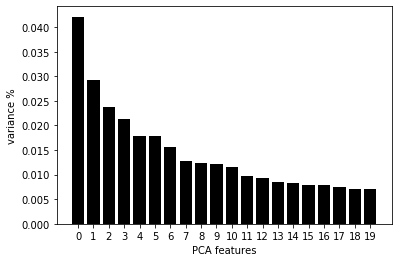

In [15]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_train)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [15]:

# Ao ter tao pouca varianza explicada com 20 componentes se analiza se continuar usando: 
# Sao necessarios muitos componentes para explicar el 95% de la varianza 

#var=0.95
#comp=20
#print('Precisa de: '+f'{PCA_var(var,X_std)}'+' para obter '+f'{var*100}'+'% de varianza')
#print('Obteria: '+f'{PCA_comp(comp,X_std)*100}'+'% de varianza explicada com '+f'{comp}'+' componentes')
# Make an instance of the Model
#pca = PCA(.7)

In [16]:
#Transformo mi base a componentes principales
# Make an instance of the Model
pca = PCA(0.5)

In [ ]:
#Fit PCA on training set. Note: you are fitting PCA on the training set only.
pca.fit(X_train)

In [ ]:
#Apply the mapping (transform) to both the training set and the test set.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train.shape

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Training a Logistic Regression model
logreg_vector = LogisticRegression()
logreg_vector.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_pred = logreg_vector.predict(X_test)

In [112]:
score = logreg_vector.score(X_test, y_test)
print(score)

0.8890308159029219


In [113]:
# Evaluating results
empty_train_performance = create_dataset()
log_reg_performance = model_analysis(logreg_vector, X_train, y_train, X_test, y_test,empty_train_performance)
log_reg_performance

,acc,prec,rec,f1,total_time
LogisticRegression cv,0.8861,0.9170,0.9273,0.9221,665.020
LogisticRegression test,0.8890,0.9212,0.9266,0.9239,3.911


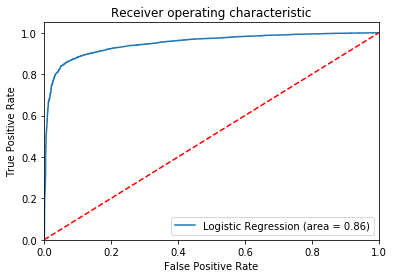

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_vector.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_vector.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

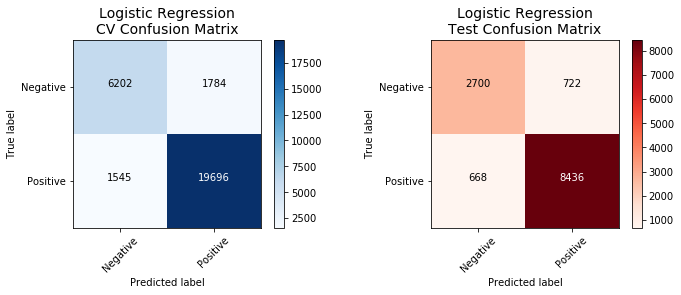

In [115]:
# Predictions LOG REG
cv_predictions = cross_val_predict(logreg_vector, X_train, y_train, cv=5)
test_pred = logreg_vector.predict(X_test)

# Confusion matrix
cv_cm = confusion_matrix(y_train, cv_predictions)
test_cm = confusion_matrix(y_test, test_pred)

# Plotting
fig = plt.figure(figsize=(10, 4))
classes = ['Negative','Positive']
plt.subplot(121)
plot_confusion_matrix(cv_cm, classes, title='Logistic Regression\nCV Confusion Matrix')
plt.subplot(122)
plot_confusion_matrix(test_cm, classes, cmap=plt.cm.Reds, title='Logistic Regression\nTest Confusion Matrix')

plt.tight_layout()
plt.show()

In [118]:
#MIRO LOS COEFICIENTES DE LAS VARIABLES
#from sklearn.linear_model import LogisticRegression
print(logreg_vector.coef_, logreg_vector.intercept_)

[[ 0.04610396  0.1037306   0.20064886 ...  0.06079593 -0.10926816
  -0.44809045]] [1.18166392]


In [127]:
coefs=logreg_vector.get_params(logreg_vector)
coefs

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [120]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(20, 8))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors, align="center")
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90)
    plt.xlabel("20 more significant words for bad reviews (red) and good reviews (right)")
    plt.ylabel("Coeficient values")

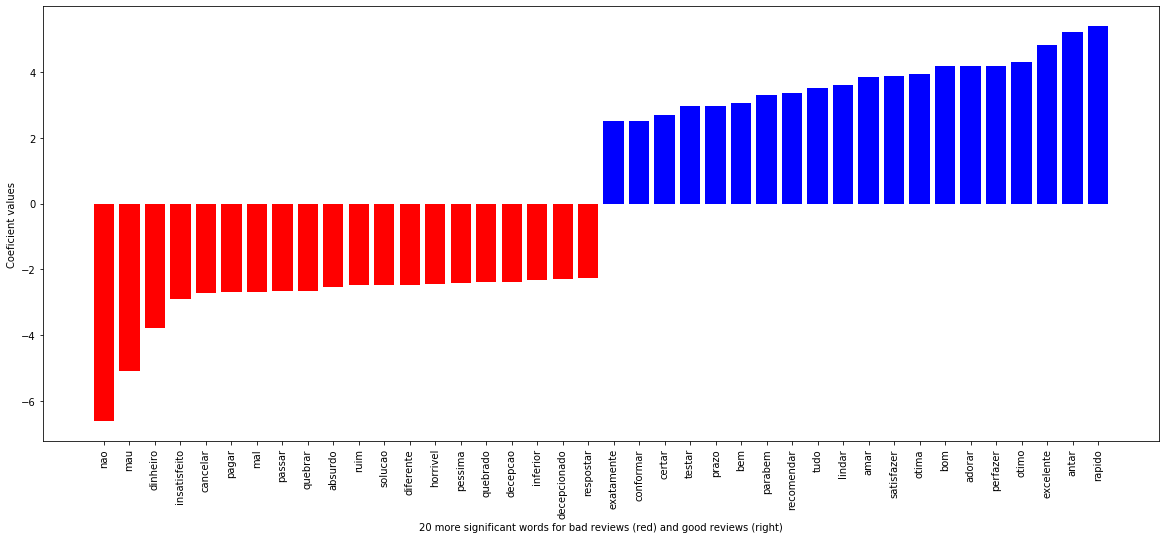

In [123]:
plot_coefficients(logreg_vector, vectorizer.get_feature_names())

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

#X_train, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [15,25,50, 100, 500,1000],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.formula.api as sm
 
model = sm.Logit(y_train, X_train)
 
result = model.fit()

 result.summary()